<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#9ec2e6;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:9px 9px;">
    제2차 데이터 분석 경진대회 (고객 이탈 분석 및 예측 모델링)</p> 

**<목표>**
- 신규 고객 유치 비용은 기존 고객 유지 비용보다 높기 때문에, 고객 이탈은 고객 감소 외에도 비용면에서 중요한 이슈
- 본 과제는 카드 고객 이탈에 대해 분석하고 예측하는 모델을 개발하는 것을 목표 (i.e. 고객 이탈을 예측하고, 이탈 감소 방안 제안)
- 고객 이탈 예측 모델은 이탈 가능성이 높은 고객을 식별하여 적절한 대응으로 이탈을 예방하거나,  
고객 세그먼트를 분류하여 타겟 마케팅 및 개인화 서비스를 제공함으로써 고객 충성도를 높이고 수익성 향상에 기여  


**<목차>**
>1. [환경세팅](#환경세팅)
>>1.1 [라이브러리 가져오기](#importing_libraries)  
>>1.2 [패키지 버전 확인하기](#check_versions)  
>>1.3 [데이터셋 가져오기](#loading_dataset)  
>2. [데이터 탐색](#데이터탐색)
>>2.1 [데이터셋 이해하기](#understanding_dataset)  
>>2.2 [탐색적 데이터 분석 (EDA)](#eda)     
>>2.3 [결측치](#missing_values)
>3. [데이터 전처리](#데이터전처리)
>>3.1 [가공](#feature_engineering)  
>>3.2 [정제](#data_cleansing)  
>>3.3 [스케일링 및 분할](#split_scale)  
>4. [모델링](#모델링)
>>4.1 [모델만들기](#building_models)  
>>4.2 [하이퍼파라미터 튜닝](#hyperparameter_tuning)  
>>4.4 [평가](#model_evaluation)
>5. [결론](#결론)
>6. [평가함수 정의](#평가함수정의)
---

# 환경세팅

<a id="importing_libraries"></a>
## Importing the Libraries

In [1]:
# 기본 데이터 정리 및 처리
import pandas as pd
import numpy as np
import math
from itertools import combinations
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)  # 모든 컬럼 보이도록
pd.options.display.float_format = '{:.5f}'.format # 지수표현 안되도록

# 시각화
import matplotlib
import matplotlib.pyplot as plt         # 그래프 그리기 위한 라이브러리
import matplotlib.patches as mpatches   # 범례 그리기 위한 라이브러리
import matplotlib.lines as mlines 
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
# classification_report로 평가 지표 확인하기
from sklearn.metrics import classification_report
from sklearn.metrics import *

# 경고 제거
import sys
import warnings
warnings.filterwarnings('ignore')

<a id="check_versions"></a>
## Check the versions of Python packages

In [ ]:
pip list

<a id="loading_dataset"></a>
## Loading the Dataset

In [3]:
# Reading the Excel file
df_churner = pd.read_csv('../0.data/bank_churner.csv')

# df_churner 복사
df = df_churner.copy()
dff = df_churner.copy()
df[:5]

Unnamed: 0      cstno  is_churned  age sex  dependent_num    education  \
0           0  708082083           0   45   F              3  High School   
1           1  708083283           1   58   M              0      Unknown   
2           2  708084558           1   46   M              3    Doctorate   
3           3  708085458           0   34   F              2   Uneducated   
4           4  708086958           0   49   F              2   Uneducated   

  marital_stat      imcome_cat card_type  mon_on_book  tot_product_count  \
0      Married  Less than $40K      Blue           36                  4   
1       Single     $40K - $60K      Blue           45                  3   
2     Divorced    $80K - $120K      Blue           38                  6   
3       Single  Less than $40K      Blue           24                  6   
4      Married         Unknown      Blue           41                  3   

   months_inact_for_12m  contact_cnt_for_12m  credit_line  tot_revol_balance  \
0                     3                    3   3544.00000                nan   
1                     1                    3   3421.00000         2517.00000   
2                     3                    3   8258.00000         1771.00000   
3                     2                    2   1438.30000            0.00000   
4                     5                    2   3128.00000          749.00000   

   mean_open_to_buy  tot_amt_ratio_q4_q1  tot_trans_amt_for_12m  \
0        1883.00000              0.83100                    nan   
1         904.00000              0.99200              992.00000   
2        6487.00000                  nan             1447.00000   
3        1438.30000              0.82700             3940.00000   
4        2379.00000              0.59800                    nan   

   tot_trans_cnt_for_12m  tot_cnt_ratio_q4_q1  mean_util_pct  
0              111.00000              0.73400        0.46900  
1               21.00000              0.40000            nan  
2               23.00000              0.00000        0.21400  
3               82.00000              0.95200        0.00000  
4                    nan                  nan        0.23900

---

# 데이터 탐색

<a id="understanding_dataset"></a>
## Understanding the Dataset

In [4]:
#Understand the  dataset
print(f"- Dataset (row, col) : {df.shape}\n")  
print(f"- Features : {df.columns.tolist()}\n")
print(f"- Data types : \n{df.dtypes.value_counts()}\n")

# df.info()

- Dataset (row, col) : (8101, 22)

- Features : ['Unnamed: 0', 'cstno', 'is_churned', 'age', 'sex', 'dependent_num', 'education', 'marital_stat', 'imcome_cat', 'card_type', 'mon_on_book', 'tot_product_count', 'months_inact_for_12m', 'contact_cnt_for_12m', 'credit_line', 'tot_revol_balance', 'mean_open_to_buy', 'tot_amt_ratio_q4_q1', 'tot_trans_amt_for_12m', 'tot_trans_cnt_for_12m', 'tot_cnt_ratio_q4_q1', 'mean_util_pct']

- Data types : 
int64      9
float64    8
object     5
dtype: int64



In [5]:
# 중복값 확인
print(f"- 중복값 : {df.duplicated().sum()}")

# 결측값 확인 
print(f"- NA값 : {df.isnull().sum().sum()}")
missing_df = pd.DataFrame({
                            "NA": df.isnull().sum(),
                            "NA %": round((df.isnull().sum()/ df.isna().count()*100), 2)
                          })

display(missing_df.sort_values(by='NA', ascending=False))
print(f"- NA값을 갖는 컬럼 개수 : {df.isnull().any().sum()}")
print("- NA값이 하나라도 포함된 행 개수 :",len(df[df.isna().any(axis=1)]))
print("- NA값이 하나도 없는 행 개수 :",len(df[~df.isna().any(axis=1)]))

- 중복값 : 0
- NA값 : 15457


NA     NA %
tot_trans_cnt_for_12m  3250 40.12000
mean_util_pct          2526 31.18000
tot_amt_ratio_q4_q1    2435 30.06000
tot_trans_amt_for_12m  1669 20.60000
tot_cnt_ratio_q4_q1    1629 20.11000
imcome_cat             1619 19.99000
tot_revol_balance      1521 18.78000
sex                     808  9.97000
months_inact_for_12m      0  0.00000
mean_open_to_buy          0  0.00000
credit_line               0  0.00000
contact_cnt_for_12m       0  0.00000
Unnamed: 0                0  0.00000
cstno                     0  0.00000
mon_on_book               0  0.00000
card_type                 0  0.00000
marital_stat              0  0.00000
education                 0  0.00000
dependent_num             0  0.00000
age                       0  0.00000
is_churned                0  0.00000
tot_product_count         0  0.00000

- NA값을 갖는 컬럼 개수 : 8
- NA값이 하나라도 포함된 행 개수 : 7261
- NA값이 하나도 없는 행 개수 : 840


**<span style= 'background-color:#fff5b1'> Summary of the dataset </span>** 

In [6]:
# df.describe(include='all').T
df.describe().T

count            mean            std  \
Unnamed: 0            8101.00000      4050.00000     2338.70160   
cstno                 8101.00000 739132946.43044 36919115.75573   
is_churned            8101.00000         0.16047        0.36707   
age                   8101.00000        46.30638        8.02253   
dependent_num         8101.00000         2.33477        1.28956   
mon_on_book           8101.00000        35.92359        8.02436   
tot_product_count     8101.00000         3.81323        1.55184   
months_inact_for_12m  8101.00000         2.34687        1.01418   
contact_cnt_for_12m   8101.00000         2.45031        1.10069   
credit_line           8101.00000      8636.54807     9086.41956   
tot_revol_balance     6580.00000      1158.69331      814.65312   
mean_open_to_buy      8101.00000      7476.16528     9080.27991   
tot_amt_ratio_q4_q1   5666.00000         0.76146        0.21765   
tot_trans_amt_for_12m 6432.00000      4438.78545     3451.91356   
tot_trans_cnt_for_12m 4851.00000        64.56834       23.65921   
tot_cnt_ratio_q4_q1   6472.00000         0.70995        0.23448   
mean_util_pct         5575.00000         0.27405        0.27583   

                                  min             25%             50%  \
Unnamed: 0                    0.00000      2025.00000      4050.00000   
cstno                 708082083.00000 713053383.00000 717886008.00000   
is_churned                    0.00000         0.00000         0.00000   
age                          26.00000        41.00000        46.00000   
dependent_num                 0.00000         1.00000         2.00000   
mon_on_book                  13.00000        31.00000        36.00000   
tot_product_count             1.00000         3.00000         4.00000   
months_inact_for_12m          0.00000         2.00000         2.00000   
contact_cnt_for_12m           0.00000         2.00000         2.00000   
credit_line                1438.30000      2555.00000      4549.00000   
tot_revol_balance             0.00000       324.75000      1272.00000   
mean_open_to_buy              3.00000      1341.00000      3495.00000   
tot_amt_ratio_q4_q1           0.00000         0.63100         0.73900   
tot_trans_amt_for_12m       510.00000      2152.75000      3905.00000   
tot_trans_cnt_for_12m        11.00000        44.50000        67.00000   
tot_cnt_ratio_q4_q1           0.00000         0.58100         0.70000   
mean_util_pct                 0.00000         0.02300         0.17500   

                                  75%             max  
Unnamed: 0                 6075.00000      8100.00000  
cstno                 772846383.00000 828343083.00000  
is_churned                    0.00000         1.00000  
age                          52.00000        70.00000  
dependent_num                 3.00000         5.00000  
mon_on_book                  40.00000        56.00000  
tot_product_count             5.00000         6.00000  
months_inact_for_12m          3.00000         6.00000  
contact_cnt_for_12m           3.00000         6.00000  
credit_line               11128.00000     34516.00000  
tot_revol_balance          1777.25000      2517.00000  
mean_open_to_buy           9942.00000     34516.00000  
tot_amt_ratio_q4_q1           0.86200         2.59400  
tot_trans_amt_for_12m      4754.25000     18484.00000  
tot_trans_cnt_for_12m        80.00000       139.00000  
tot_cnt_ratio_q4_q1           0.81800         3.57100  
mean_util_pct                 0.50100         0.99900

In [7]:
df.describe(exclude=np.number).T

count unique             top  freq
sex           7293      2               F  3840
education     8101      7        Graduate  2528
marital_stat  8101      4         Married  3767
imcome_cat    6482      6  Less than $40K  2277
card_type     8101      4            Blue  7557

In [8]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes(include=['object']).columns.to_list()

In [9]:
for i in cat:
    print(f"{i}:\n {df[i].unique()}\n")

sex:
 ['F' 'M' nan]

education:
 ['High School' 'Unknown' 'Doctorate' 'Uneducated' 'Graduate' 'College'
 'Post-Graduate']

marital_stat:
 ['Married' 'Single' 'Divorced' 'Unknown']

imcome_cat:
 ['Less than $40K' '$40K - $60K' '$80K - $120K' 'Unknown' '$60K - $80K' nan
 '$120K +']

card_type:
 ['Blue' 'Silver' 'Gold' 'Platinum']



---
**Data Dictionary**  

|LABELS|DESCRIPTIONS|
|------|:-----------|
|cstno| 고객번호|
|is_churned| 이탈 여부, 0이면 유지 1이면 이탈|
|age| 나이|
|sex| 성별 (M/F), <span style="color:red">Null 존재 (808개)</span>|
|dependent_num| 부양가족수 (0~5)|
|education| 교육수준 (7개, unknown 포함)|
|marital_stat| 결혼상태 (4개, unknown 포함)|
|imcome_cat| 수입규모 (6개, unknown 포함), <span style="color:red">Null 존재 (1,619개)</span>|
|card_type| 카드종류 (4개)|
|mon_on_book| 은행 거래 기간 (13~56M)|
|tot_product_count| 현재 보유 상품 개수 (1~6)|
|months_inact_for_12m| 최근 12개월 동안 카드 거래가 없었던 개월 수 (0~6M)|
|contact_cnt_for_12m| 최근 12개월동안 연락 횟수 (0~6)|
|credit_line| 카드 한도|
|tot_revol_balance| 리볼빙 잔액, <span style="color:red">Null 존재 (1,521개)</span>|
|mean_open_to_buy| 평균 사용가능 신용한도|
|tot_amt_ratio_q4_q1| 1분기 대비 4분기의 거래 금액 비율, <span style="color:red">Null 존재 (2,435개)</span>|
|tot_trans_amt_for_12m| 최근 12개월 동안의 거래 금액, <span style="color:red">Null 존재 (1,669개)</span>|
|tot_trans_cnt_for_12m| 최근 12개월 동안의 거래 횟수, <span style="color:red">Null 존재 (3,250개)</span>|
|tot_cnt_ratio_q4_q1| 1분기 대비 4분기의 거래 횟수 비율, <span style="color:red">Null 존재 (1,629개)</span>|
|mean_util_pct| 평균 한도 소진율, <span style="color:red">Null 존재 (2,526개)</span>|

---

<a id="eda"></a>
## EDA

In [10]:
# 함수

def churn(df, col): #특정 열에 대해 이탈률 평균 값
    return df.groupby(col)['is_churned'].mean()

def perc_on_bar(feature):
    sns.set(rc={'figure.figsize':(6,4)})
    ax=sns.countplot(x=feature, data=df, palette="mako")
    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot


def bar_plot(feature, target, show_df=True):
    f,ax = plt.subplots(1,2,figsize=(10,4),constrained_layout=True)   
    # perc_on_bar
    sns.set(font_scale=0.8) 
    a=sns.countplot(x=feature, data=df, palette='Paired',ax=ax[0],order=sorted(feature.value_counts().index))
    total = len(feature) # length of the column
    for p in a.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2-0.15    # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        a.annotate(percentage_label, (x, y), size = 10) # annotate the percantage
   # stacked_plot
    sorter = target.value_counts().index[-1]
    if show_df == True:
        info = pd.crosstab(feature, target, margins=True)
    pd.crosstab(feature, target, normalize='index').plot(kind='bar',color=('gainsboro','Tomato'),stacked=True,ax=ax[1])
    plt.legend(loc="lower left", frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    for bar in ax[1].patches:
        ax[1].text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + bar.get_y() - 0.05,
                    f"{round(bar.get_height()*100,1)}%",
                    ha = 'center',
                    size=10
                  )
    plt.xticks(rotation=45)    
    plt.show() 
    
def histogram_boxplot(feature, figsize=(10, 4), bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
                                            nrows = 2, # Number of rows of the subplot grid= 2
                                            sharex = True, # x-axis will be shared among all subplots
                                            gridspec_kw = {"height_ratios": (.25, .75)}, 
                                            figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='gainsboro') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.histplot(feature, kde=True, ax=ax_hist2,color="darkgray") # For histogram
    ax_hist2.axvline(feature.median(), color='blue', linestyle='-'); # 중앙값 np.median(feature)
    ax_hist2.axvline(feature.mean(), color='green', linestyle='--') # 평균 np.mean(feature)
    plt.show() # show the plot

def bar_line(df,col,rotation):
    tmp = pd.DataFrame({
                            "tot_cnt": df.groupby(col)['cstno'].count(),
                            "churn_cnt": df.groupby(col)['is_churned'].sum()
                       })
    tmp['churn_rate'] = tmp['churn_cnt'] / tmp['tot_cnt']
    tmp.reset_index(inplace=True)
    plt.figure(figsize=(10,2))
    # Bar (count_value)
    x = np.arange(len(tmp))
    xlabel = tmp[col].to_list()
    bar = plt.bar(x=x,height=tmp['tot_cnt'],width=0.5,color="darkgray",alpha=0.7,linewidth=0)
    plt.ylabel('count')
    plt.xticks(x,labels=xlabel,fontsize=8,rotation=rotation)
    plt.yticks(fontsize=10)
    # Line (churn_rate)
    twinx = plt.twinx() #이중축 생성
    twinx.set_ylim(0,1)
    plot = twinx.plot(x,tmp['churn_rate'].to_list(),color="Tomato")
    plt.ylabel('rate')
    plt.yticks(fontsize=8)
    # 범례
    ax1_patch = mpatches.Patch(label='Count',linewidth=0,color='gainsboro')
    ax2_patch = mpatches.Patch(label='Chrun Rate',linewidth=0,color='Tomato')
    plt.legend(handles=[ax1_patch, ax2_patch], frameon=False, fontsize=8, loc='upper right')
    plt.grid(False) # 격자제거
    plt.show()
    
def show_boxplots(cols: list, feature: str, show_fliers=True, data=df):
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        if show_fliers:
            sns.boxplot(df[feature], df[variable], palette="mako", showfliers=True) 
        else:
            sns.boxplot(df[feature], df[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

def show_countplots(cols: list, feature: str, data=df):
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        sns.countplot(df[feature], hue=df[variable], palette="mako") 
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

temp = df.copy()

**<span style= 'background-color:#fff5b1'> "is_churned" 분석</span>**

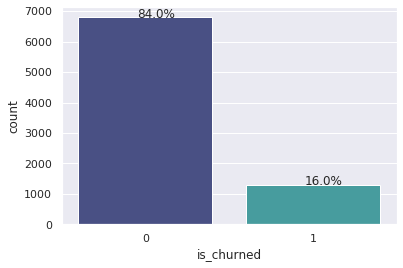

In [11]:
# 이탈 여부
# 전체(8,101명) = 유지(6,801명) + 이탈(1,300명)
perc_on_bar(df.is_churned)

**Observations:**

- 전체 고객 중 유지고객 84%, 이탈고객 16%
- 데이터가 불균형한 분포를 가지는 경우, 모델의 학습이 제대로 이루어지지 않을 확률이 높음
- 데이터 불균형 해소를 위해 오버 샘플링 고려 (오버샘플링 : 소수 범주의 데이터를 다수 범주의 데이터 수에 맞게 늘리는 샘플링 방식)

**<span style= 'background-color:#fff5b1'> "age" 분석</span>**

In [12]:
# 나이
print('Oldest :', df['age'].max())
print('Youngest :', df['age'].min())
print('Average Age :', round(df['age'].mean(),1))
print('Median Age :', df['age'].median())

Oldest : 70
Youngest : 26
Average Age : 46.3
Median Age : 46.0


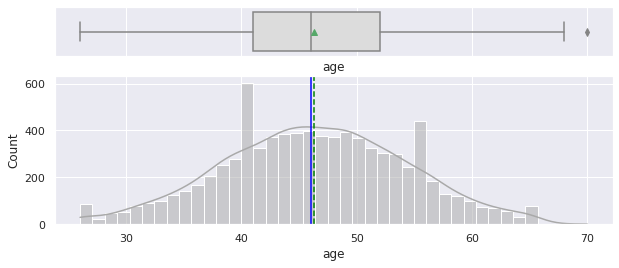

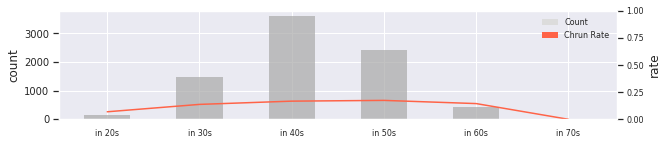

In [13]:
histogram_boxplot(df.age)

temp['age_Range'] = pd.cut(df['age'],bins=[0,29,39,49,59,69,79]
                                    ,labels=['in 20s','in 30s','in 40s','in 50s','in 60s','in 70s']
                                   )
bar_line(temp,"age_Range",0)

**Observations:**

- 전체 고객 중 40-50대가 가장 많음
- 평균을 기준으로 좌우대칭 형태를 보이며, 70세 고객 1명은 실제 고객의 경향을 나타내므로 이상치로 보기 어려움
- 20대 고객의 이탈률이 가장 낮음 (70세 고객 1명 제외)

**<span style= 'background-color:#fff5b1'> "sex" 분석</span>**

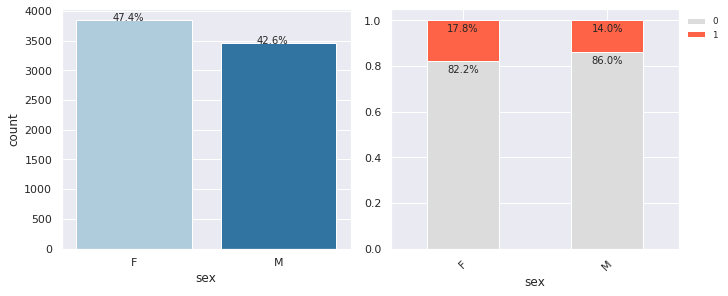

결측치(%) :  [9.97407727]


In [14]:
# 성별
# 전체(8,101명) = 남자(3,453명) + 여자(3,840명) + Null(808명)
bar_plot(df.sex, df.is_churned)
print("결측치(%) : ",df.sex.isna().sum()/df.sex.shape*100)

**Observations:**

- 남성 고객보다 여성 고객이 많음 (여성 47.4%, 남성 42.6%)
- 남성 고객보다 여성 고객이 이탈률이 3.8%p 높음

**<span style= 'background-color:#fff5b1'>"dependent_num" 분석</span>**

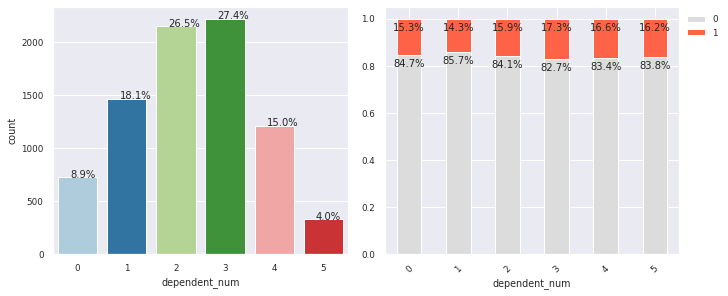

In [15]:
# 부양가족수 (0~5명)
bar_plot(df.dependent_num, df.is_churned)
# histogram_boxplot(df.dependent_num)
# bar_line(df,"dependent_num",0)

**Observations:**

- 고객의 부양가족수는 대부분 2-3명
- 다른 고객에 비해 부양가족수가 3-4명인 고객의 이탈률이 더 높음

**<span style= 'background-color:#fff5b1'>"education" 분석</span>**

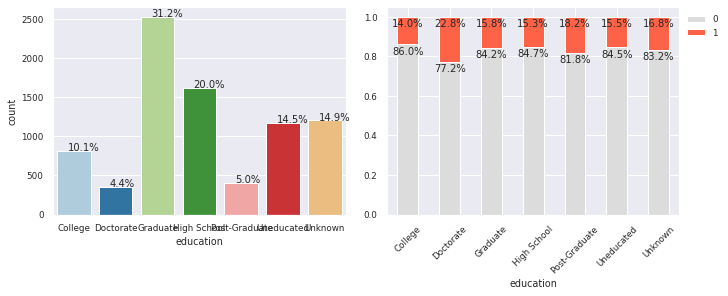

In [16]:
# 교육수준 (7개, unknown 포함)
bar_plot(df.education, df.is_churned)

**Observations:**

- 고객의 교육수준은 Graduate이 31.2%로 가장 많고, Doctorate 4.4%로 가장 적음
- 교육수준에 따른 고객의 이탈률은 Doctorate(22.8%), Post-Graduate(18.2%) 순으로 높음

**<span style= 'background-color:#fff5b1'>"marital_stat" 분석</span>**

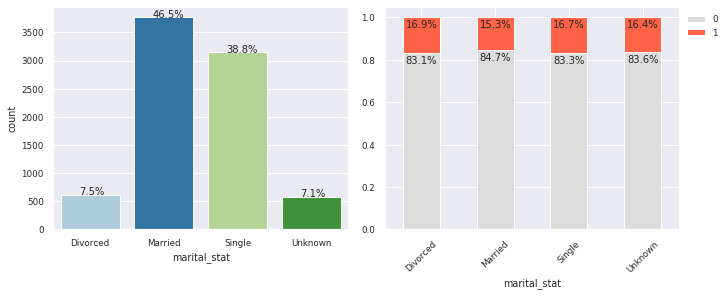

In [17]:
# 결혼상태 (4개, unknown 포함)
bar_plot(df.marital_stat, df.is_churned)

**Observations:**

- 전체 고객 중 기혼자 46.5%, 미혼자(Single) 38.8% 순으로 가장 많음
- 결혼상태에 따른 고객의 이탈률 차이는 크게 없으나, 다른 고객에 비해 기혼 고객의 이탈률이 좀 더 낮음

**<span style= 'background-color:#fff5b1'>"imcome_cat" 분석</span>**

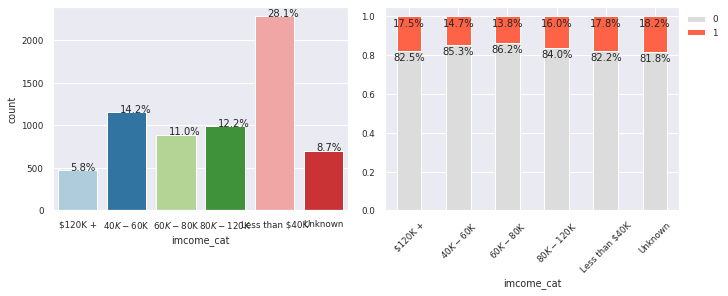

결측치(%) :  [19.98518701]


In [18]:
# 수입규모 (6개, unknown 포함), Null 존재(1,619개)
bar_plot(df.imcome_cat, df.is_churned)
print("결측치(%) : ",df.imcome_cat.isna().sum()/df.imcome_cat.shape*100)

**Observations:**

- 고객의 수입규모는 40K 미만이 가장 많음
- 수입규모가 60K-80K인 고객의 이탈률이 13.8%로 가장 낮음
- 수입규모가 40K 미만(17.8%), 120K+(17.5%)인 고객의 이탈률이 가장 높음

**<span style= 'background-color:#fff5b1'>"card_type" 분석</spna>**

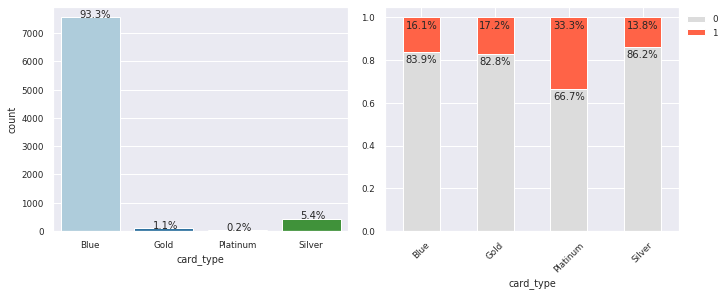

In [19]:
# 카드종류 (4개)
bar_plot(df.card_type, df.is_churned)

**Observations:**

- 고객의 카드 종류는 Blue가 93.3%
- Blue 이외에 카드 종류를 사용하는 고객의 비율이 매우 낮음 (why? 발급조건(고소득자/고학력자) or 서비스불만)
- 카드 종류가 플래티늄인 고객의 이탈률이 33.3%로 가장 높음

**<span style= 'background-color:#fff5b1'>"mon_on_book" 분석</span>**

In [20]:
# 은행 거래 기간 (13~56M)
print('최대값 :', df['mon_on_book'].max())
print('최소값 :', df['mon_on_book'].min())
print('평균값 :', round(df['mon_on_book'].mean(),1))
print('중앙값 :', round(df['mon_on_book'].median(),1))

최대값 : 56
최소값 : 13
평균값 : 35.9
중앙값 : 36.0


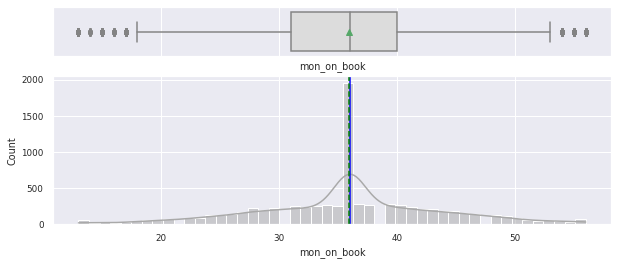

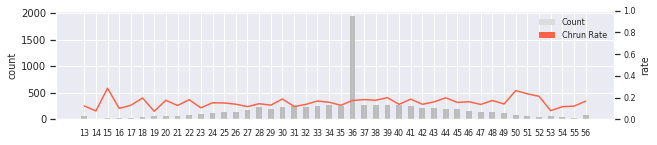

In [21]:
histogram_boxplot(df.mon_on_book)
bar_line(df,"mon_on_book",0)

**Observations:**

- 고객의 은행 거래 기간은 3년(36M)이 가장 많음
- 은행 거래 기간의 평균과 중앙값이 거의 같고, 분포는 좌우대칭 형태를 보임
- 상자 그림의 오른쪽 끝과 왼쪽 끝에는 일부 이상치가 있지만, 실제 고객의 경향을 나타내므로 제거하지 않음
- 은행 거래 기간이 15M, 50M인 고객의 이탈률이 가장 높음

**<span style= 'background-color:#fff5b1'>"tot_product_count" 분석</span>**

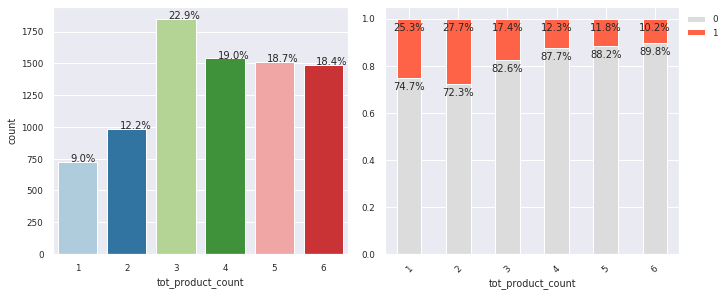

In [22]:
# 현재 보유상품 (1~6개)
bar_plot(df.tot_product_count, df.is_churned)

**Observations:**

- 고객의 현재 보유 상품 개수는 3개가 22.9%로 가장 많음
- 현재 보유 상품 개수가 1,2개인 고객의 이탈률이 가장 높음
- 현재 보유 상품 개수가 증가할수록 고객의 이탈률이 감소하는 경향이 있음

**<span style= 'background-color:#fff5b1'>"months_inact_for_12m" 분석</span>**

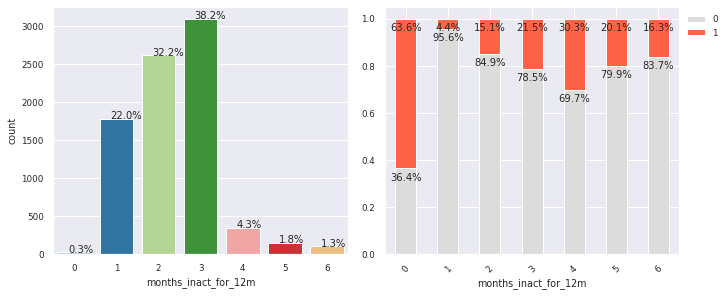

In [23]:
# 최근 12개월 동안 카드 거래가 없었던 개월 수 (0~6M)
bar_plot(df.months_inact_for_12m, df.is_churned)
# histogram_boxplot(df.months_inact_for_12m)
# bar_line(df,"months_inact_for_12m",0)

**Observations:**

- 최근 1년 중 3개월 카드 거래가 없는 고객이 38.2%로 가장 많고, 매월 거래하는 고객이 0.3%로 가장 적음
- 최근 1년 중 1개월 카드 거래가 없는 고객의 이탈률이 4.4%로 가장 낮음
- 카드 거래가 없었던 개월수가 증가할수록 이탈률도 증가하다가 특정개월수에 도달했을 때, 이탈률이 감소하는 경향을 보임 (매월 사용하는 고객 제외)  
why? 특정기간동안 거래가 없는 고객 상대로 프로모션 or 방치..?

**<span style= 'background-color:#fff5b1'>"contact_cnt_for_12m" 분석</span>**

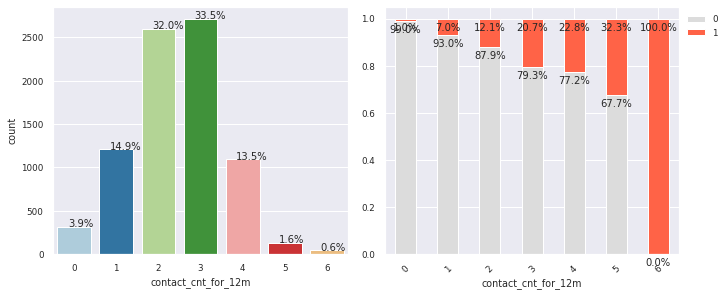

In [24]:
# 최근 12개월동안 연락 횟수 (0~6번)
bar_plot(df.contact_cnt_for_12m, df.is_churned)
# histogram_boxplot(df.contact_cnt_for_12m)
# bar_line(df,"contact_cnt_for_12m",0)

**Observations:**

- 고객의 최근 1년 동안 연락 횟수는 2-3번이 가장 많고, 6번이 가장 적음
- 연락 횟수가 증가할수록 고객의 이탈률이 증가하는 추세 (why? 고객의 문제를 빠르게 처리하지 못해 불만족으로 이어져 이탈할 가능성 있음)

**<span style= 'background-color:#fff5b1'>"credit_line" 분석</span>**

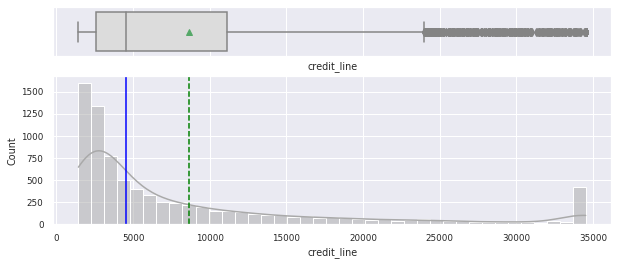

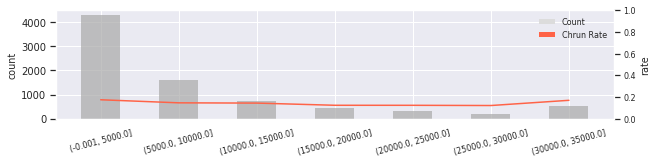

In [25]:
# 카드 한도
histogram_boxplot(df.credit_line)

temp['creditline_Range'] = pd.cut(df['credit_line'],bins=[0,5000,10000,15000,20000,25000,30000,35000]
                                    ,include_lowest=True
#                                   ,labels=['A','B','C','D','E','F']
                                   )
bar_line(temp,"creditline_Range",15)

**Observations:**

- 카드한도 분포는 오른쪽으로 꼬리가 긴 형태 (중앙값보다 평균이 더 큼)
- 상자 그림의 오른쪽에 이상치가 있지만, 실제 고객의 경향을 나타내므로 제거하지 않음
- 카드한도 구간에 따른 고객의 이탈률 차이는 크게 없음

**<span style= 'background-color:#fff5b1'>"tot_revol_balance" 분석</span>**

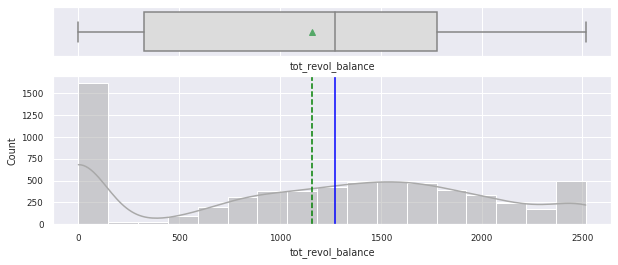

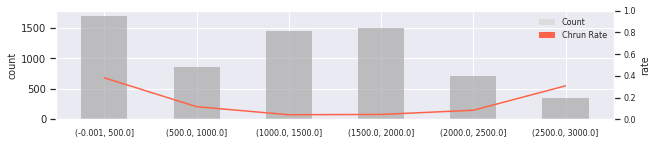

결측치(%) :  [18.77545982]


In [26]:
# 리볼빙잔액, missing_value(1,521)
histogram_boxplot(df.tot_revol_balance)

temp['revolbalance_Range'] = pd.cut(df['tot_revol_balance'],bins=[0,500,1000,1500,2000,2500,3000]
                                    ,include_lowest=True
#                                   ,labels=['A','B','C','D','E','F']
                                   )
bar_line(temp,"revolbalance_Range",0)

print("결측치(%) : ",df.tot_revol_balance.isna().sum()/df.tot_revol_balance.shape*100)

**Observations:**

- 리볼빙잔액이 500이하인 고객이 가장 많음 (중앙값보다 평균이 더 작음)
- 리볼빙잔액 구간이 [0~500]인 고객의 이탈률이 가장 높음

**<span style= 'background-color:#fff5b1'>"mean_open_to_buy" 분석</span>**

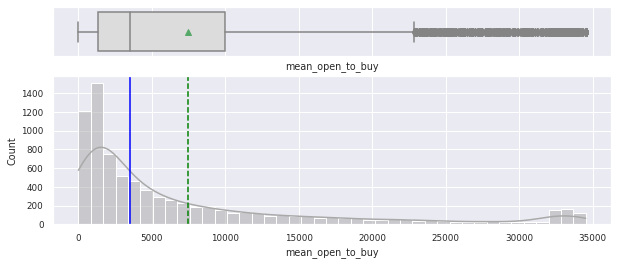

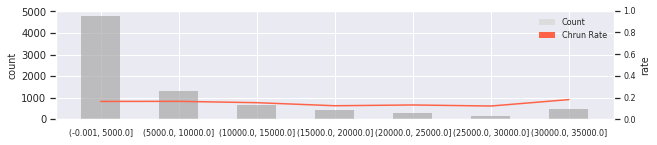

In [27]:
# 평균 사용가능 신용한도
histogram_boxplot(df.mean_open_to_buy)

temp['meanopentobuy_Range'] = pd.cut(df['mean_open_to_buy'],bins=[0,5000,10000,15000,20000,25000,30000,35000]
                                    ,include_lowest=True
#                                   ,labels=['A','B','C','D','E','F']
                                   )
bar_line(temp,"meanopentobuy_Range",0)

**Observations:**

- 평균 사용가능 신용한도 분포는 오른쪽으로 꼬리가 긴 형태 (중앙값보다 평균이 더 큼)
- 상자 그림의 오른쪽에 이상치가 있지만, 실제 고객의 경향을 나타내므로 제거하지 않음
- 평균 사용가능 신용한도에 따른 고객의 이탈률 차이는 크게 없음
- 앞서 확인한 카드한도(credit_line)분포와 유사

**<span style= 'background-color:#fff5b1'>"tot_amt_ratio_q4_q1" 분석</span>**

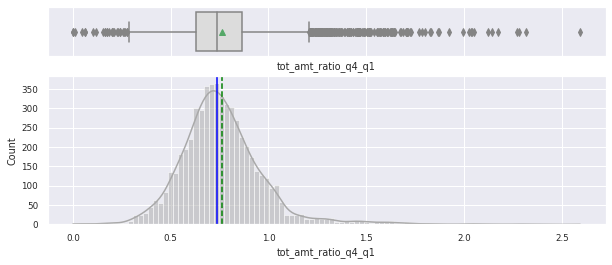

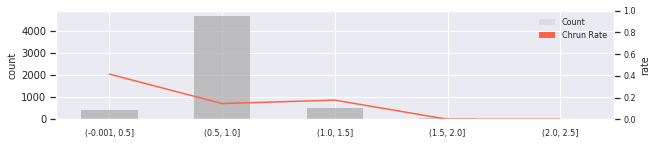

결측치(%) :  [30.05801753]


In [28]:
# 1분기 대비 4분기의 거래 금액 비율, Null 존재(2,435개)
histogram_boxplot(df.tot_amt_ratio_q4_q1)

temp['totamtratioq4q1_Range'] = pd.cut(df['tot_amt_ratio_q4_q1'],bins=[0,0.5,1.0,1.5,2.0,2.5]
                                    ,include_lowest=True
#                                   ,labels=['A','B','C','D','E','F']
                                   )
bar_line(temp,"totamtratioq4q1_Range",0)
print("결측치(%) : ",df.tot_amt_ratio_q4_q1.isna().sum()/df.tot_amt_ratio_q4_q1.shape*100)

**Observations:**

- 상자 그림에서 많은 이상치를 확인할 수 있으나, 1분기 대비 4분기의 비율을 나타내므로 제거하지 않음
- 1분기 대비 4분기의 거래 금액 비율이 0.5~1.0인 고객이 가장 많음
- 1분기 대비 4분기의 거래 금액 비율 구간이 [0~0.5]인 고객의 이탈률이 가장 높음

**<span style= 'background-color:#fff5b1'>"tot_trans_amt_for_12m" 분석</span>**

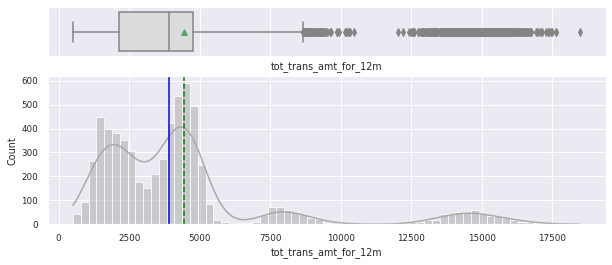

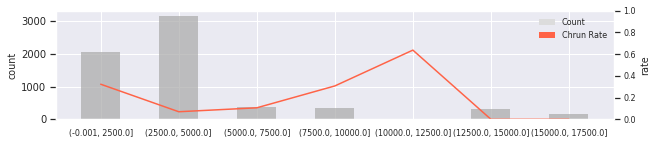

결측치(%) :  [20.60239477]


In [29]:
# 최근 12개월 동안의 거래 금액, Null 존재(1,669개)
histogram_boxplot(df.tot_trans_amt_for_12m)

temp['tottransamtfor12m_Range'] = pd.cut(df['tot_trans_amt_for_12m'],bins=[0,2500,5000,7500,10000,12500,15000,17500]
                                    ,include_lowest=True
#                                   ,labels=['A','B','C','D','E','F']
                                   )
bar_line(temp,"tottransamtfor12m_Range",0)
print("결측치(%) : ",df.tot_trans_amt_for_12m.isna().sum()/df.tot_trans_amt_for_12m.shape*100)

**Observations:**

- 최근 12개월 동안의 거래 금액이 12,500 이상인 이상치가 많으나, 실제 고객의 경향을 나타내므로 제거하지 않음
- 최근 12개월 동안의 거래 금액이 5,000 이하인 고객이 가장 많음
- 최근 12개월 동안의 거래 금액이 12,500을 초과한 고객은 이탈하지 않음

**<span style= 'background-color:#fff5b1'>"tot_trans_cnt_for_12m" 분석</span>**

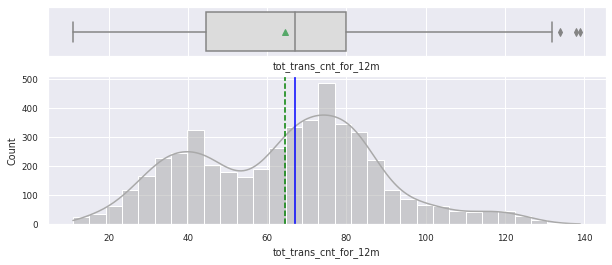

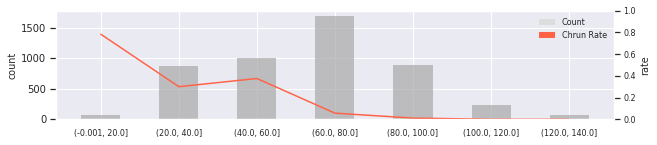

결측치(%) :  [40.11850389]


In [30]:
# 최근 12개월 동안의 거래 횟수, Null 존재(3,250개)
histogram_boxplot(df.tot_trans_cnt_for_12m)

temp['tottranscntfor12m_Range'] = pd.cut(df['tot_trans_cnt_for_12m'],bins=[0,20,40,60,80,100,120,140]
                                         ,include_lowest=True
#                                          ,labels=['A','B','C','D','E','F']
                                        )
bar_line(temp,"tottranscntfor12m_Range",0)
print("결측치(%) : ",df.tot_trans_cnt_for_12m.isna().sum()/df.tot_trans_cnt_for_12m.shape*100)

**Observations:**

- 상자 그림의 오른쪽에 이상치가 있지만, 실제 고객의 경향을 나타내므로 제거하지 않음
- 최근 12개월 동안 60~80건 거래한 고객이 가장 많음
- 최근 12개월 동안의 거래 횟수가 증가할수록 고객의 이탈률이 감소하는 경향이 있음

**<span style= 'background-color:#fff5b1'>"tot_cnt_ratio_q4_q1" 분석</span>**

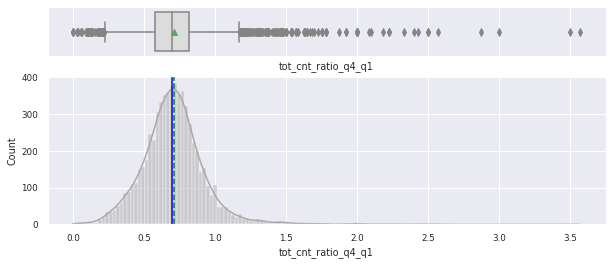

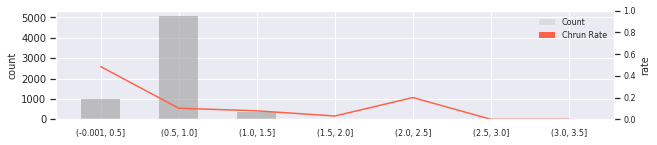

결측치(%) :  [20.10862856]


In [31]:
# 1분기 대비 4분기의 거래 횟수 비율, Null 존재(1,629개)
histogram_boxplot(df.tot_cnt_ratio_q4_q1)

temp['totcntratioq4q1_Range'] = pd.cut(df['tot_cnt_ratio_q4_q1'],bins=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5]
                                    ,include_lowest=True
#                                   ,labels=['A','B','C','D','E','F']
                                   )
bar_line(temp,"totcntratioq4q1_Range",0)
print("결측치(%) : ",df.tot_cnt_ratio_q4_q1.isna().sum()/df.tot_cnt_ratio_q4_q1.shape*100)

**Observations:**

- 상자 그림에서 많은 이상치를 확인할 수 있으나, 1분기 대비 4분기의 비율을 나타내므로 제거하지 않음
- 1분기 대비 4분기의 거래 횟수 비율이 0.5~1.0인 고객이 가장 많음
- 1분기 대비 4분기의 거래 횟수 비율 구간이 [0~0.5]인 고객의 이탈률이 가장 높음

**<span style= 'background-color:#fff5b1'>"mean_util_pct" 분석</span>**

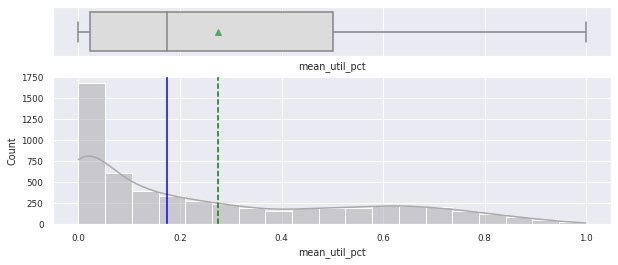

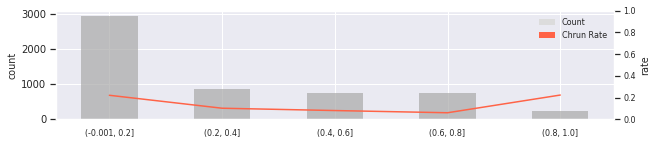

결측치(%) :  [31.18133564]


In [32]:
# 평균 한도 소진율, Null 존재(2,526개)
histogram_boxplot(df.mean_util_pct)

temp['meanutilpct_Range'] = pd.cut(df['mean_util_pct'],bins=[0,0.2,0.4,0.6,0.8,1.0]
                                    ,include_lowest=True
#                                   ,labels=['A','B','C','D','E','F']
                                   )
bar_line(temp,"meanutilpct_Range",0)
print("결측치(%) : ",df.mean_util_pct.isna().sum()/df.mean_util_pct.shape*100)

In [33]:
churn(temp,'meanutilpct_Range')

meanutilpct_Range
(-0.001, 0.2]   0.22098
(0.2, 0.4]      0.10185
(0.4, 0.6]      0.08047
(0.6, 0.8]      0.06024
(0.8, 1.0]      0.22311
Name: is_churned, dtype: float64

**Observations:**

- 평균 한도 소진율이 0.2이하인 고객이 가장 많음
- 평균 한도 소진율이 0.2이하, 0.8초과인 고객의 이탈률이 가장 높음

**<span style= 'background-color:#fff5b1'>"유지/이탈고객" 분석</span>**

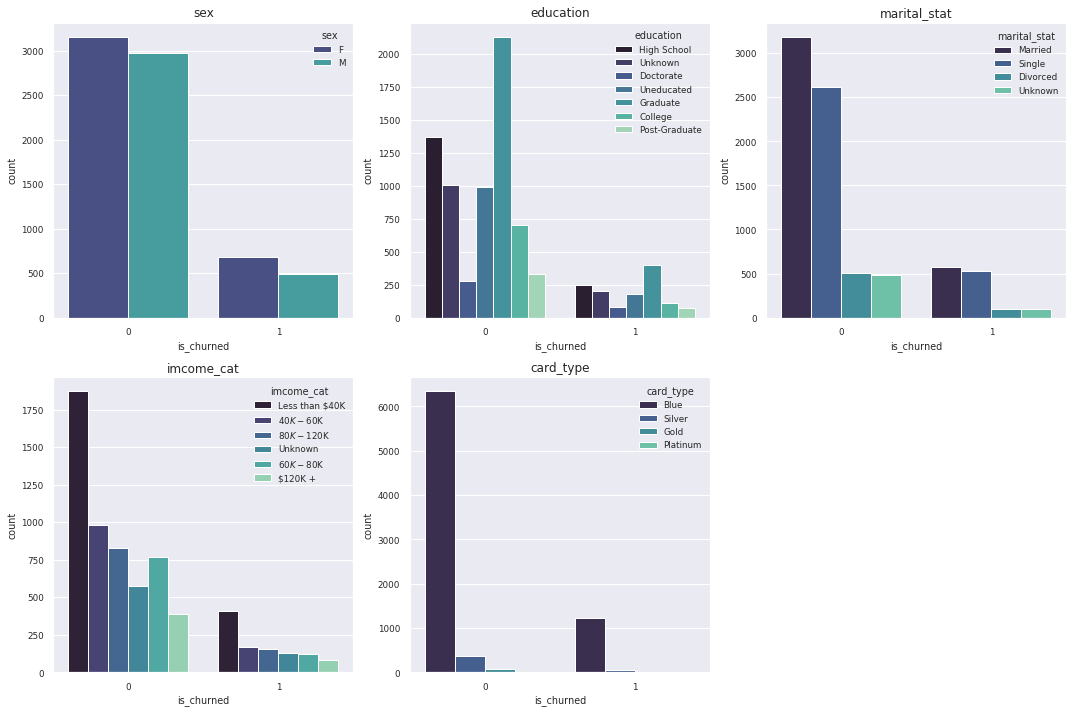

In [34]:
# 범주형
cols = df.select_dtypes(include='object').columns.tolist()
show_countplots(cols,'is_churned')

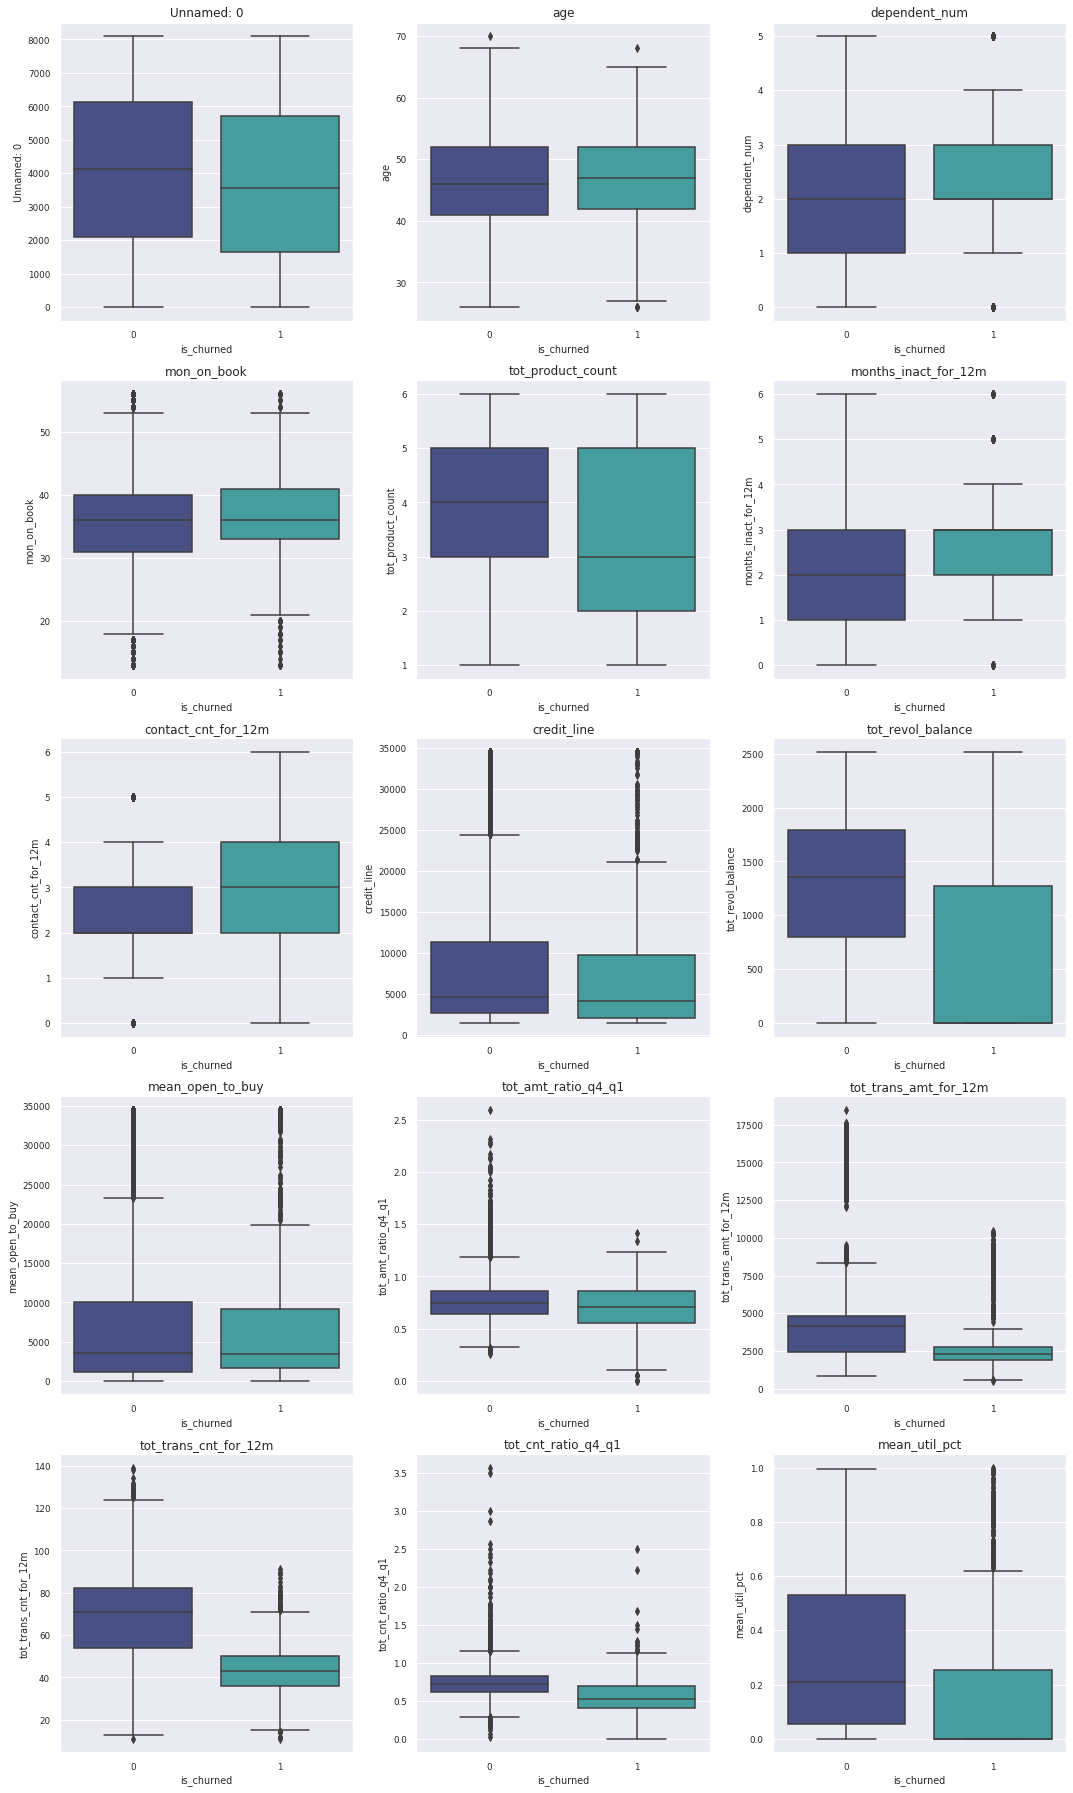

In [35]:
# 연속형
cols = df.select_dtypes(include=['integer','float']).drop(['cstno','is_churned'],axis=1).columns.tolist()
show_boxplots(cols, 'is_churned')

**Observations:**

- 이탈고객과 유지고객의 성별 비율은 큰 차이가 없음
- 유지고객에 비해 이탈고객의 평균 나이가 더 높음
- 유지고객에 비해 이탈고객의 평균 현재보유상품개수(tot_product_count)가 더 적음
- 유지고객에 비해 이탈고객의 3분위수 카드한도(credit_line) 금액이 더 적음
- 유지고객에 비해 이탈고객의 평균 리볼빙잔액(tot_revol_balance)이 더 적음
- 유지고객에 비해 이탈고객의 평균 최근 12개월 동안의 거래 금액(tot_trans_amt_for_12m)가 더 적음
- 유지고객에 비해 이탈고객의 평균 최근 12개월 동안의 거래 횟수(tot_trans_cnt_for_12m)가 더 적음
- 유지고객에 비해 이탈고객의 평균 1분기 대비 4분기의 거래 횟수 비율(tot_cnt_ratio_q4_q1)이 더 낮음
- 유지고객에 비해 이탈고객의 평균 평균한도소진율(mean_util_pct)이 더 낮음

**<span style= 'background-color:#fff5b1'>각 열의 상관관계 파악</span>**

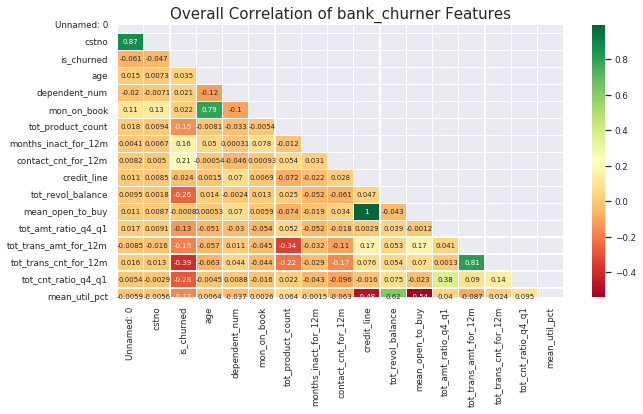

In [36]:
# Co-relation 매트릭스
corr = df.corr()                           # 변수 corr에 data 데이터셋에 콜리레이션을 만드는 함수를 (.corr()) 붙임
# print(corr)

# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)     # 여기에 0으로 된 매트릭스를 마스크에 붙임 -> 모양을 만드는 것
# print(mask)                                 # 앞에 corr에서 관계 숫자는 만들어졌고, mask는 같은 모양의 매트릭스
mask[np.triu_indices_from(mask)] = True      # triu : 오른쪽 위 삼각형을 의미 

# 그래프 셋업
plt.figure(figsize=(10, 5))
# 그래프를 그릴 그림판을 만드는 것
# 그래프 타이틀
plt.title('Overall Correlation of bank_churner Features', fontsize=15)
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':7}) 
plt.show()

**Observations:**

- 나이와 은행거래기간(mon_on_book)의 상관관계 = 0.79 (고령 고객일수록 은행거래기간이 높을 수 있기 때문)
- 카드한도(credit_line)와 평균사용가능신용한도(mean_open_to_buy)의 상관관계 = 1 (모델링할 때, 둘 중 하나 선택)
- 최근12M동안의거래금액(tot_trans_amt_for_12m)과 최근12M동안의거래횟수(tot_trans_cnt_for_12m)의 상관관계 = 0.81 (둘 다 카드 거래와 관련이 있기 때문, 결측치 추정시 고려)
- 평균한도소진율(mean_util_pct)은 카드한도(credit_line), 리볼빙잔액(tot_revol_balance), 평균사용가능신용한도(mean_open_to_buy)과 연결된 것으로 보임 (결측치 추정시 고려)

---

In [37]:
churn(temp,'tot_product_count')

tot_product_count
1   0.25344
2   0.27716
3   0.17441
4   0.12346
5   0.11780
6   0.10215
Name: is_churned, dtype: float64

In [38]:
churn(temp,'age_Range')

age_Range
in 20s   0.06918
in 30s   0.13710
in 40s   0.16699
in 50s   0.17390
in 60s   0.14458
in 70s   0.00000
Name: is_churned, dtype: float64

In [39]:
churn(temp,'revolbalance_Range')

revolbalance_Range
(-0.001, 500.0]    0.38154
(500.0, 1000.0]    0.11601
(1000.0, 1500.0]   0.04187
(1500.0, 2000.0]   0.04476
(2000.0, 2500.0]   0.08322
(2500.0, 3000.0]   0.30791
Name: is_churned, dtype: float64

In [40]:
churn(temp,'totamtratioq4q1_Range')

totamtratioq4q1_Range
(-0.001, 0.5]   0.41565
(0.5, 1.0]      0.14474
(1.0, 1.5]      0.17647
(1.5, 2.0]      0.00000
(2.0, 2.5]      0.00000
Name: is_churned, dtype: float64

In [41]:
churn(temp,'totcntratioq4q1_Range')

totcntratioq4q1_Range
(-0.001, 0.5]   0.48469
(0.5, 1.0]      0.10187
(1.0, 1.5]      0.07799
(1.5, 2.0]      0.03030
(2.0, 2.5]      0.20000
(2.5, 3.0]      0.00000
(3.0, 3.5]      0.00000
Name: is_churned, dtype: float64

In [42]:
churn(temp,'tottransamtfor12m_Range')

tottransamtfor12m_Range
(-0.001, 2500.0]     0.32278
(2500.0, 5000.0]     0.06955
(5000.0, 7500.0]     0.10569
(7500.0, 10000.0]    0.30678
(10000.0, 12500.0]   0.63636
(12500.0, 15000.0]   0.00000
(15000.0, 17500.0]   0.00000
Name: is_churned, dtype: float64

In [43]:
churn(temp,'tottranscntfor12m_Range')

tottranscntfor12m_Range
(-0.001, 20.0]   0.78261
(20.0, 40.0]     0.30000
(40.0, 60.0]     0.37525
(60.0, 80.0]     0.05660
(80.0, 100.0]    0.01115
(100.0, 120.0]   0.00000
(120.0, 140.0]   0.00000
Name: is_churned, dtype: float64

---

<a id="missing_values"></a>
## Missing Values

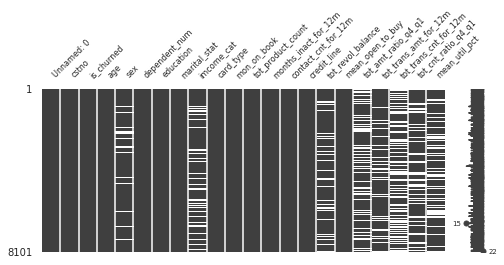

In [44]:
# 각 열과 각 행의 결측값 확인 (빈 값 데이터는 흰색으로 나타남)
# 오른쪽 스파크라인은 각 행의 데이터의 완전성을 나타냄
missingno.matrix(df, figsize = (8,3), fontsize=8)

In [45]:
display(missing_df[missing_df['NA']!=0].sort_values(by='NA', ascending=False))

NA     NA %
tot_trans_cnt_for_12m  3250 40.12000
mean_util_pct          2526 31.18000
tot_amt_ratio_q4_q1    2435 30.06000
tot_trans_amt_for_12m  1669 20.60000
tot_cnt_ratio_q4_q1    1629 20.11000
imcome_cat             1619 19.99000
tot_revol_balance      1521 18.78000
sex                     808  9.97000

- 결측값 처리 가이드라인  
10% 미만 : 삭제 or 대치  
10 ~ 20% 미만: Hot deck or regression or model based imputation  
20 ~ 50% 미만 : regression or model based imputation  
50% 이상 : 컬럼삭제

KNN Imputer 
 - 마땅히 결측치를 채울 방법이 떠오르지 않을 때 사용
 - KNNImputer는 KNN 알고리즘을 사용하여 결측치를 채우는 방식
 - 즉, 가까운 이웃의 수를 정하고 그 이웃들을 이용하여 결측치를 채우는 방식

**<span style= 'background-color:#fff5b1'>"sex & imcome_cat"</span>**

- sex(성별), imcome_cat(수입규모) : 최빈값을 대체값으로 사용

In [46]:
# use simple imputer to impute the most_frequent values in categorical column
sex_imputer = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
df.sex = sex_imputer.fit_transform(df["sex"].values.reshape(-1,1))[:,0]

imcome_cat_imputer = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
df.imcome_cat = imcome_cat_imputer.fit_transform(df["imcome_cat"].values.reshape(-1,1))[:,0]

In [47]:
df.sex.value_counts()

F    4648
M    3453
Name: sex, dtype: int64

In [48]:
df.imcome_cat.value_counts()

Less than $40K    3896
$40K - $60K       1151
$80K - $120K       988
$60K - $80K        891
Unknown            702
$120K +            473
Name: imcome_cat, dtype: int64

**<span style= 'background-color:#fff5b1'>"tot_revol_balance & mean_util_pct"</span>**

- credit_line(카드한도) = tot_revol_balance(리볼빙잔액) + mean_open_to_buy(평균사용가능신용한도)
- mean_util_pct(평균한도소진율) = tot_revol_balance(리볼빙잔액) / credit_line(카드한도)

In [49]:
# check [credit_line (카드한도) = tot_revol_balance(리볼빙잔액) + mean_open_to_buy(평균사용가능신용한도)] 
df[(~df['tot_revol_balance'].isna()) & (df['credit_line'] != df['tot_revol_balance'] + df['mean_open_to_buy'])].shape[0]

0

In [50]:
# Impute null values for tot_revol_balance
df.loc[df['tot_revol_balance'].isna(),'tot_revol_balance'] = df['credit_line'] - df['mean_open_to_buy']
df[:5]

Unnamed: 0      cstno  is_churned  age sex  dependent_num    education  \
0           0  708082083           0   45   F              3  High School   
1           1  708083283           1   58   M              0      Unknown   
2           2  708084558           1   46   M              3    Doctorate   
3           3  708085458           0   34   F              2   Uneducated   
4           4  708086958           0   49   F              2   Uneducated   

  marital_stat      imcome_cat card_type  mon_on_book  tot_product_count  \
0      Married  Less than $40K      Blue           36                  4   
1       Single     $40K - $60K      Blue           45                  3   
2     Divorced    $80K - $120K      Blue           38                  6   
3       Single  Less than $40K      Blue           24                  6   
4      Married         Unknown      Blue           41                  3   

   months_inact_for_12m  contact_cnt_for_12m  credit_line  tot_revol_balance  \
0                     3                    3   3544.00000         1661.00000   
1                     1                    3   3421.00000         2517.00000   
2                     3                    3   8258.00000         1771.00000   
3                     2                    2   1438.30000            0.00000   
4                     5                    2   3128.00000          749.00000   

   mean_open_to_buy  tot_amt_ratio_q4_q1  tot_trans_amt_for_12m  \
0        1883.00000              0.83100                    nan   
1         904.00000              0.99200              992.00000   
2        6487.00000                  nan             1447.00000   
3        1438.30000              0.82700             3940.00000   
4        2379.00000              0.59800                    nan   

   tot_trans_cnt_for_12m  tot_cnt_ratio_q4_q1  mean_util_pct  
0              111.00000              0.73400        0.46900  
1               21.00000              0.40000            nan  
2               23.00000              0.00000        0.21400  
3               82.00000              0.95200        0.00000  
4                    nan                  nan        0.23900

In [51]:
# check [mean_util_pct(평균한도소진율) = tot_revol_balance(리볼빙잔액) / credit_line(카드한도)] 
df[(~df['mean_util_pct'].isna()) & (df['mean_util_pct'] != round(df['tot_revol_balance'] / df['credit_line'],3))].shape[0]

1042

In [52]:
# Impute null values for mean_util_pct
df.loc[df['mean_util_pct'].isna(),'mean_util_pct'] = round(df['tot_revol_balance'] / df['credit_line'],3)
df[:5]

Unnamed: 0      cstno  is_churned  age sex  dependent_num    education  \
0           0  708082083           0   45   F              3  High School   
1           1  708083283           1   58   M              0      Unknown   
2           2  708084558           1   46   M              3    Doctorate   
3           3  708085458           0   34   F              2   Uneducated   
4           4  708086958           0   49   F              2   Uneducated   

  marital_stat      imcome_cat card_type  mon_on_book  tot_product_count  \
0      Married  Less than $40K      Blue           36                  4   
1       Single     $40K - $60K      Blue           45                  3   
2     Divorced    $80K - $120K      Blue           38                  6   
3       Single  Less than $40K      Blue           24                  6   
4      Married         Unknown      Blue           41                  3   

   months_inact_for_12m  contact_cnt_for_12m  credit_line  tot_revol_balance  \
0                     3                    3   3544.00000         1661.00000   
1                     1                    3   3421.00000         2517.00000   
2                     3                    3   8258.00000         1771.00000   
3                     2                    2   1438.30000            0.00000   
4                     5                    2   3128.00000          749.00000   

   mean_open_to_buy  tot_amt_ratio_q4_q1  tot_trans_amt_for_12m  \
0        1883.00000              0.83100                    nan   
1         904.00000              0.99200              992.00000   
2        6487.00000                  nan             1447.00000   
3        1438.30000              0.82700             3940.00000   
4        2379.00000              0.59800                    nan   

   tot_trans_cnt_for_12m  tot_cnt_ratio_q4_q1  mean_util_pct  
0              111.00000              0.73400        0.46900  
1               21.00000              0.40000        0.73600  
2               23.00000              0.00000        0.21400  
3               82.00000              0.95200        0.00000  
4                    nan                  nan        0.23900

**<span style= 'background-color:#fff5b1'>"tot_trans_amt_for_12m & tot_trans_cnt_for_12m"</span>**

- tot_trans_amt_for_12m(최근12M동안의거래금액) = tot_trans_cnt_for_12m(최근12M동안의거래횟수)의 그룹별 중앙값으로 대치
- tot_trans_cnt_for_12m(최근12M동안의거래횟수) = tot_trans_amt_for_12m(최근12M동안의거래금액)의 그룹별 중앙값으로 대치
- 둘다 null인 경우, KNN Imputer 처리

In [53]:
num

['Unnamed: 0',
 'cstno',
 'is_churned',
 'age',
 'dependent_num',
 'mon_on_book',
 'tot_product_count',
 'months_inact_for_12m',
 'contact_cnt_for_12m',
 'credit_line',
 'tot_revol_balance',
 'mean_open_to_buy',
 'tot_amt_ratio_q4_q1',
 'tot_trans_amt_for_12m',
 'tot_trans_cnt_for_12m',
 'tot_cnt_ratio_q4_q1',
 'mean_util_pct']

In [54]:
# KNN Imputer 
df_knn = dff[num].copy()
df_knn.iloc[:,:] = KNNImputer(n_neighbors=10).fit_transform(df_knn)
df_knn[:5]

Unnamed: 0           cstno  is_churned      age  dependent_num  \
0     0.00000 708082083.00000     0.00000 45.00000        3.00000   
1     1.00000 708083283.00000     1.00000 58.00000        0.00000   
2     2.00000 708084558.00000     1.00000 46.00000        3.00000   
3     3.00000 708085458.00000     0.00000 34.00000        2.00000   
4     4.00000 708086958.00000     0.00000 49.00000        2.00000   

   mon_on_book  tot_product_count  months_inact_for_12m  contact_cnt_for_12m  \
0     36.00000            4.00000               3.00000              3.00000   
1     45.00000            3.00000               1.00000              3.00000   
2     38.00000            6.00000               3.00000              3.00000   
3     24.00000            6.00000               2.00000              2.00000   
4     41.00000            3.00000               5.00000              2.00000   

   credit_line  tot_revol_balance  mean_open_to_buy  tot_amt_ratio_q4_q1  \
0   3544.00000         1259.40000        1883.00000              0.83100   
1   3421.00000         2517.00000         904.00000              0.99200   
2   8258.00000         1771.00000        6487.00000              0.78590   
3   1438.30000            0.00000        1438.30000              0.82700   
4   3128.00000          749.00000        2379.00000              0.59800   

   tot_trans_amt_for_12m  tot_trans_cnt_for_12m  tot_cnt_ratio_q4_q1  \
0             3834.10000              111.00000              0.73400   
1              992.00000               21.00000              0.40000   
2             1447.00000               23.00000              0.00000   
3             3940.00000               82.00000              0.95200   
4             3834.10000               60.90000              0.65770   

   mean_util_pct  
0        0.46900  
1        0.19610  
2        0.21400  
3        0.00000  
4        0.23900

In [55]:
# tot_trans_amt_for_12m 그룹화
df['tottranscntfor12m_Range'] = pd.cut(df['tot_trans_cnt_for_12m'],bins=[0,20,40,60,80,100,120,140]
                                         ,include_lowest=True
                                         ,labels=['A','B','C','D','E','F','G']
                                      )
df.groupby('tottranscntfor12m_Range').agg({'tot_trans_amt_for_12m':'median'}).to_dict()
display(df.groupby('tottranscntfor12m_Range').agg({'tot_trans_amt_for_12m':'median'}))

tot_trans_amt_for_12m
tottranscntfor12m_Range                       
A                                    801.00000
B                                   1527.00000
C                                   2338.00000
D                                   4220.00000
E                                   4816.00000
F                                  14357.00000
G                                  14781.00000

In [56]:
# Impute null values for tot_trans_amt_for_12m
x1 = {'A': 801.0,
      'B': 1527.0,
      'C': 2338.0,
      'D': 4220.0,
      'E': 4816.0,
      'F': 14357.0,
      'G': 14781.0}
df['amt_median'] = df['tottranscntfor12m_Range'].map(x1)
df['tot_trans_amt_for_12m'] = np.where(pd.notnull(df['tot_trans_amt_for_12m'])==True
                                         ,df['tot_trans_amt_for_12m'], df['amt_median'])

In [57]:
# tot_trans_cnt_for_12m 그룹화
df['tottransamtfor12m_Range'] = pd.cut(df['tot_trans_amt_for_12m'],bins=[0,2500,5000,7500,10000,12500,15000,17500]
                                     ,include_lowest=True
                                     ,labels=['A','B','C','D','E','F','G']
                                    )
df.groupby('tottransamtfor12m_Range').agg({'tot_trans_cnt_for_12m':'median'}).to_dict()
display(df.groupby('tottransamtfor12m_Range').agg({'tot_trans_cnt_for_12m':'median'}))

tot_trans_cnt_for_12m
tottransamtfor12m_Range                       
A                                     39.00000
B                                     73.00000
C                                     81.00000
D                                     87.00000
E                                     66.00000
F                                    110.00000
G                                    115.00000

In [58]:
# Impute null values for tot_trans_cnt_for_12m
x2 = {'A': 39.0,
      'B': 73.0,
      'C': 81.0,
      'D': 87.0,
      'E': 66.0,
      'F': 110.0,
      'G': 115.0}
df['cnt_median'] = df['tottransamtfor12m_Range'].map(x2)
df['tot_trans_cnt_for_12m'] = np.where(pd.notnull(df['tot_trans_cnt_for_12m'])==True
                                         ,df['tot_trans_cnt_for_12m'], df['cnt_median'])

In [59]:
# 둘다 null인 경우, KNN Imputer 처리
print(df['tot_trans_amt_for_12m'].isna().sum())
print(df['tot_trans_cnt_for_12m'].isna().sum())

680
682


In [60]:
df['tot_trans_amt_for_12m'] = np.where(pd.notnull(df['tot_trans_amt_for_12m'])==True
                                         ,df['tot_trans_amt_for_12m'], df_knn['tot_trans_amt_for_12m'])
df['tot_trans_cnt_for_12m'] = np.where(pd.notnull(df['tot_trans_cnt_for_12m'])==True
                                         ,df['tot_trans_cnt_for_12m'], df_knn['tot_trans_cnt_for_12m'])

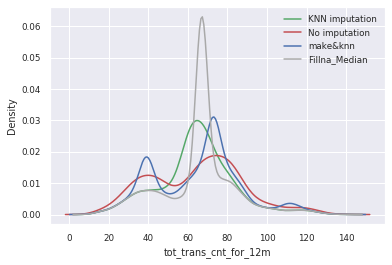

In [61]:
sns.kdeplot(df_knn['tot_trans_cnt_for_12m'] , c = 'g' , label = 'KNN imputation')
sns.kdeplot(dff['tot_trans_cnt_for_12m'], c = 'r' , label = 'No imputation')
sns.kdeplot(df['tot_trans_cnt_for_12m'], c = 'b' , label = 'make&knn')
sns.kdeplot(dff['tot_trans_cnt_for_12m'].fillna(dff['tot_trans_cnt_for_12m'].median()) , c = 'darkgray' , label = 'Fillna_Median')
plt.legend()
plt.show()

**<span style= 'background-color:#fff5b1'>"tot_amt_ratio_q4_q1 & tot_cnt_ratio_q4_q1"</span>**

 - tot_amt_ratio_q4_q1 & tot_cnt_ratio_q4_q1 : 1분기 대비 4분기의 거래 금액(횟수) 비율이 0이면, 1분기 대비 4분기의 거래 횟수(금액) 비율도 0  
 - 나머지는 KNN Imputer 처리

In [62]:
df[df['tot_amt_ratio_q4_q1'] == 0][['cstno','tot_amt_ratio_q4_q1','tot_cnt_ratio_q4_q1']]

cstno  tot_amt_ratio_q4_q1  tot_cnt_ratio_q4_q1
3435  716315508              0.00000                  nan
8062  827117808              0.00000              0.00000

In [63]:
df[df['tot_cnt_ratio_q4_q1'] == 0][['cstno','tot_amt_ratio_q4_q1','tot_cnt_ratio_q4_q1']]

cstno  tot_amt_ratio_q4_q1  tot_cnt_ratio_q4_q1
2     708084558                  nan              0.00000
10    708108333              0.01000              0.00000
7996  824140908                  nan              0.00000
8062  827117808              0.00000              0.00000

In [64]:
df.loc[df['tot_amt_ratio_q4_q1'] == 0,'tot_cnt_ratio_q4_q1'].fillna(0)

3435   0.00000
8062   0.00000
Name: tot_cnt_ratio_q4_q1, dtype: float64

In [65]:
df.loc[df['tot_cnt_ratio_q4_q1'] == 0,'tot_amt_ratio_q4_q1'].fillna(0)

2      0.00000
10     0.01000
7996   0.00000
8062   0.00000
Name: tot_amt_ratio_q4_q1, dtype: float64

In [66]:
df['tot_amt_ratio_q4_q1'] = np.where(pd.notnull(df['tot_amt_ratio_q4_q1'])==True
                                         ,df['tot_amt_ratio_q4_q1'], df_knn['tot_amt_ratio_q4_q1'])
df['tot_cnt_ratio_q4_q1'] = np.where(pd.notnull(df['tot_cnt_ratio_q4_q1'])==True
                                         ,df['tot_cnt_ratio_q4_q1'], df_knn['tot_cnt_ratio_q4_q1'])

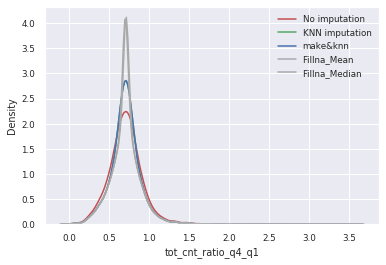

In [67]:
sns.kdeplot(dff['tot_cnt_ratio_q4_q1'] , c = 'r' , label = 'No imputation')
sns.kdeplot(df_knn['tot_cnt_ratio_q4_q1'] , c = 'g' , label = 'KNN imputation')
sns.kdeplot(df['tot_cnt_ratio_q4_q1'], c = 'b' , label = 'make&knn')
sns.kdeplot(dff['tot_cnt_ratio_q4_q1'].fillna(dff['tot_cnt_ratio_q4_q1'].mean()) , c = 'darkgray' , label = 'Fillna_Mean')
sns.kdeplot(dff['tot_cnt_ratio_q4_q1'].fillna(dff['tot_cnt_ratio_q4_q1'].median()) , c = 'darkgray' , label = 'Fillna_Median')
plt.legend()
plt.show()

---

# 데이터 전처리

<a id="feature_engineering"></a>
## Feature Engineering

**<span style= 'background-color:#fff5b1'>신규 항목 생성</span>**

- 3가지 변수 추가 : trans_loyal(거래금액,거래횟수), tot_revol_balance_0(리볼빙잔액여부), chng_q4_q1(1분기대비4분기거래)

In [68]:
# tot_revol_balance_0
df["tot_revol_balance_0"]= [1 if i == 0 else 0 for i in df['tot_revol_balance']] 
df.groupby("tot_revol_balance_0").agg({"is_churned": ["mean","count"]})

is_churned      
                          mean count
tot_revol_balance_0                 
0                      0.09534  6115
1                      0.36103  1986

In [69]:
# trans_loyal
df['trans_loyal'] = 0
df.loc[((df['tot_trans_amt_for_12m'] >= 12500) | (df['tot_trans_cnt_for_12m'] >= 100)), 'trans_loyal'] = 1
df.groupby("trans_loyal").agg({"is_churned": ["mean","count"]})

is_churned      
                  mean count
trans_loyal                 
0              0.17303  7513
1              0.00000   588

In [70]:
# chng_q4_q1
df['chng_q4_q1'] = 0
df.loc[((df['tot_amt_ratio_q4_q1'] < 0.5) | (df['tot_cnt_ratio_q4_q1'] < 0.5)), 'chng_q4_q1'] = 1
df.groupby("chng_q4_q1").agg({"is_churned": ["mean","count"]})

is_churned      
                 mean count
chng_q4_q1                 
0             0.11167  6967
1             0.46032  1134

<a id="data_cleansing"></a>
##  Data Cleansing

In [71]:
#list of all the numeric columns
numeric = df.select_dtypes('number').columns.to_list()

In [72]:
# Feature별 유일한 값 개수 확인
df_num = df[numeric].copy()
print(df_num.nunique().sort_values())

chng_q4_q1                  2
tot_revol_balance_0         2
is_churned                  2
trans_loyal                 2
dependent_num               6
tot_product_count           6
months_inact_for_12m        7
contact_cnt_for_12m         7
age                        44
mon_on_book                44
tot_trans_cnt_for_12m     355
mean_util_pct            1119
tot_revol_balance        1883
tot_cnt_ratio_q4_q1      1967
tot_amt_ratio_q4_q1      2643
tot_trans_amt_for_12m    4502
credit_line              5325
mean_open_to_buy         5757
cstno                    8101
Unnamed: 0               8101
dtype: int64


In [73]:
df_cat = df[cat].copy()
print(df_cat.nunique().sort_values())

sex             2
marital_stat    4
card_type       4
imcome_cat      6
education       7
dtype: int64


**<span style= 'background-color:#fff5b1'>의미없는 변수 삭제</span>**

- 유일한(고유) 값이 1개인 경우 또는 모든 행의 값이 다른 경우는 제거 (의미가 없기 때문에)
- Target Feature가 포함되어 있으면 함께 제거

In [74]:
df_num = df_num.drop(['cstno','is_churned'],axis=1,errors='ignore')

In [75]:
# df_cat = df_cat.drop(['sex','imcome_cat'],axis=1,errors='ignore')

**<span style= 'background-color:#fff5b1'>상관성에 따른 Feature 정제</span>**

- 숫자형 컬럼들 간 Pearson R 상관계수를 구함
- 상관계수가 0.9이상인 컬럼들 중 가장 큰 컬럼을 제거 
- a가 정해지면 b라는 지수가 당연히 정해지는 것처럼 상관도가 높은 것은 의심하고 제거할만한 요소임 
- 컬럼들 간 조합 생성 : comb_num_feat = np.array(list(combinations(num_feat,2)))
- Pearson R 상관계수구하기 : pearsonr(x1,x2)[0]

In [76]:
num_feat = df_num.columns.values
comb_num_feat = np.array(list(combinations(num_feat,2)))
corr_num_feat = np.array([])

for comb in comb_num_feat:
    corr = pearsonr(df_num[comb[0]], df_num[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat,corr)

# 상관도 0.9이상 -> 두개 중 하나를 제거
high_corr_num = comb_num_feat[np.abs(corr_num_feat)>=0.9]
high_corr_num

array([['credit_line', 'mean_open_to_buy']], dtype='<U21')

In [77]:
# Feature 제거
df_num = df_num.drop(np.unique(high_corr_num[:,0]),axis=1,errors='ignore')

In [78]:
# 명목형 변수 상관관계
df_cat_dummies = pd.get_dummies(df_cat)
df_cat_dummies[:3]

sex_F  sex_M  education_College  education_Doctorate  education_Graduate  \
0      1      0                  0                    0                   0   
1      0      1                  0                    0                   0   
2      0      1                  0                    1                   0   

   education_High School  education_Post-Graduate  education_Uneducated  \
0                      1                        0                     0   
1                      0                        0                     0   
2                      0                        0                     0   

   education_Unknown  marital_stat_Divorced  marital_stat_Married  \
0                  0                      0                     1   
1                  1                      0                     0   
2                  0                      1                     0   

   marital_stat_Single  marital_stat_Unknown  imcome_cat_$120K +  \
0                    0                     0                   0   
1                    1                     0                   0   
2                    0                     0                   0   

   imcome_cat_$40K - $60K  imcome_cat_$60K - $80K  imcome_cat_$80K - $120K  \
0                       0                       0                        0   
1                       1                       0                        0   
2                       0                       0                        1   

   imcome_cat_Less than $40K  imcome_cat_Unknown  card_type_Blue  \
0                          1                   0               1   
1                          0                   0               1   
2                          0                   0               1   

   card_type_Gold  card_type_Platinum  card_type_Silver  
0               0                   0                 0  
1               0                   0                 0  
2               0                   0                 0

In [79]:
def cramers_V(var1,var2):
    crosstab = np.array(pd.crosstab(var1,var2,rownames=None,colnames=None)) #Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the chi2 test
    obs = np.sum(crosstab) #Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

rows = []

for var1 in df_cat_dummies:
    col = []
    for var2 in df_cat_dummies:
        cramers = cramers_V(df_cat_dummies[var1], df_cat_dummies[var2]) #Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
tmp = pd.DataFrame(cramers_results, columns=df_cat_dummies.columns, index=df_cat_dummies.columns)

tmp.head()

sex_F   sex_M  education_College  education_Doctorate  \
sex_F               1.00000 1.00000            0.00000              0.00000   
sex_M               1.00000 1.00000            0.00000              0.00000   
education_College   0.00000 0.00000            1.00000              0.00000   
education_Doctorate 0.00000 0.00000            0.00000              1.00000   
education_Graduate  0.00000 0.00000            0.05000              0.02000   

                     education_Graduate  education_High School  \
sex_F                           0.00000                0.00000   
sex_M                           0.00000                0.00000   
education_College               0.05000                0.03000   
education_Doctorate             0.02000                0.01000   
education_Graduate              1.00000                0.11000   

                     education_Post-Graduate  education_Uneducated  \
sex_F                                0.00000               0.00000   
sex_M                                0.00000               0.00000   
education_College                    0.01000               0.02000   
education_Doctorate                  0.00000               0.01000   
education_Graduate                   0.02000               0.08000   

                     education_Unknown  marital_stat_Divorced  \
sex_F                          0.00000                0.00000   
sex_M                          0.00000                0.00000   
education_College              0.02000                0.00000   
education_Doctorate            0.01000                0.00000   
education_Graduate             0.08000                0.00000   

                     marital_stat_Married  marital_stat_Single  \
sex_F                             0.00000              0.00000   
sex_M                             0.00000              0.00000   
education_College                 0.00000              0.00000   
education_Doctorate               0.00000              0.00000   
education_Graduate                0.00000              0.00000   

                     marital_stat_Unknown  imcome_cat_$120K +  \
sex_F                             0.00000             0.06000   
sex_M                             0.00000             0.06000   
education_College                 0.00000             0.00000   
education_Doctorate               0.00000             0.00000   
education_Graduate                0.00000             0.00000   

                     imcome_cat_$40K - $60K  imcome_cat_$60K - $80K  \
sex_F                               0.00000                 0.11000   
sex_M                               0.00000                 0.11000   
education_College                   0.00000                 0.00000   
education_Doctorate                 0.00000                 0.00000   
education_Graduate                  0.00000                 0.00000   

                     imcome_cat_$80K - $120K  imcome_cat_Less than $40K  \
sex_F                                0.13000                    0.16000   
sex_M                                0.13000                    0.16000   
education_College                    0.00000                    0.00000   
education_Doctorate                  0.00000                    0.00000   
education_Graduate                   0.00000                    0.00000   

                     imcome_cat_Unknown  card_type_Blue  card_type_Gold  \
sex_F                           0.06000         0.00000         0.00000   
sex_M                           0.06000         0.00000         0.00000   
education_College               0.00000         0.00000         0.00000   
education_Doctorate             0.00000         0.00000         0.00000   
education_Graduate              0.00000         0.00000         0.00000   

                     card_type_Platinum  card_type_Silver  
sex_F                           0.00000           0.00000  
sex_M                           0.00000           0.00000  
education_College               0.00000  

**<span style= 'background-color:#fff5b1'>Feature 시각화</span>**

In [80]:
dn = df[numeric].copy()

In [81]:
dn = dn.drop('cstno',axis=1,errors='ignore')

In [82]:
n = dn.columns.to_list()

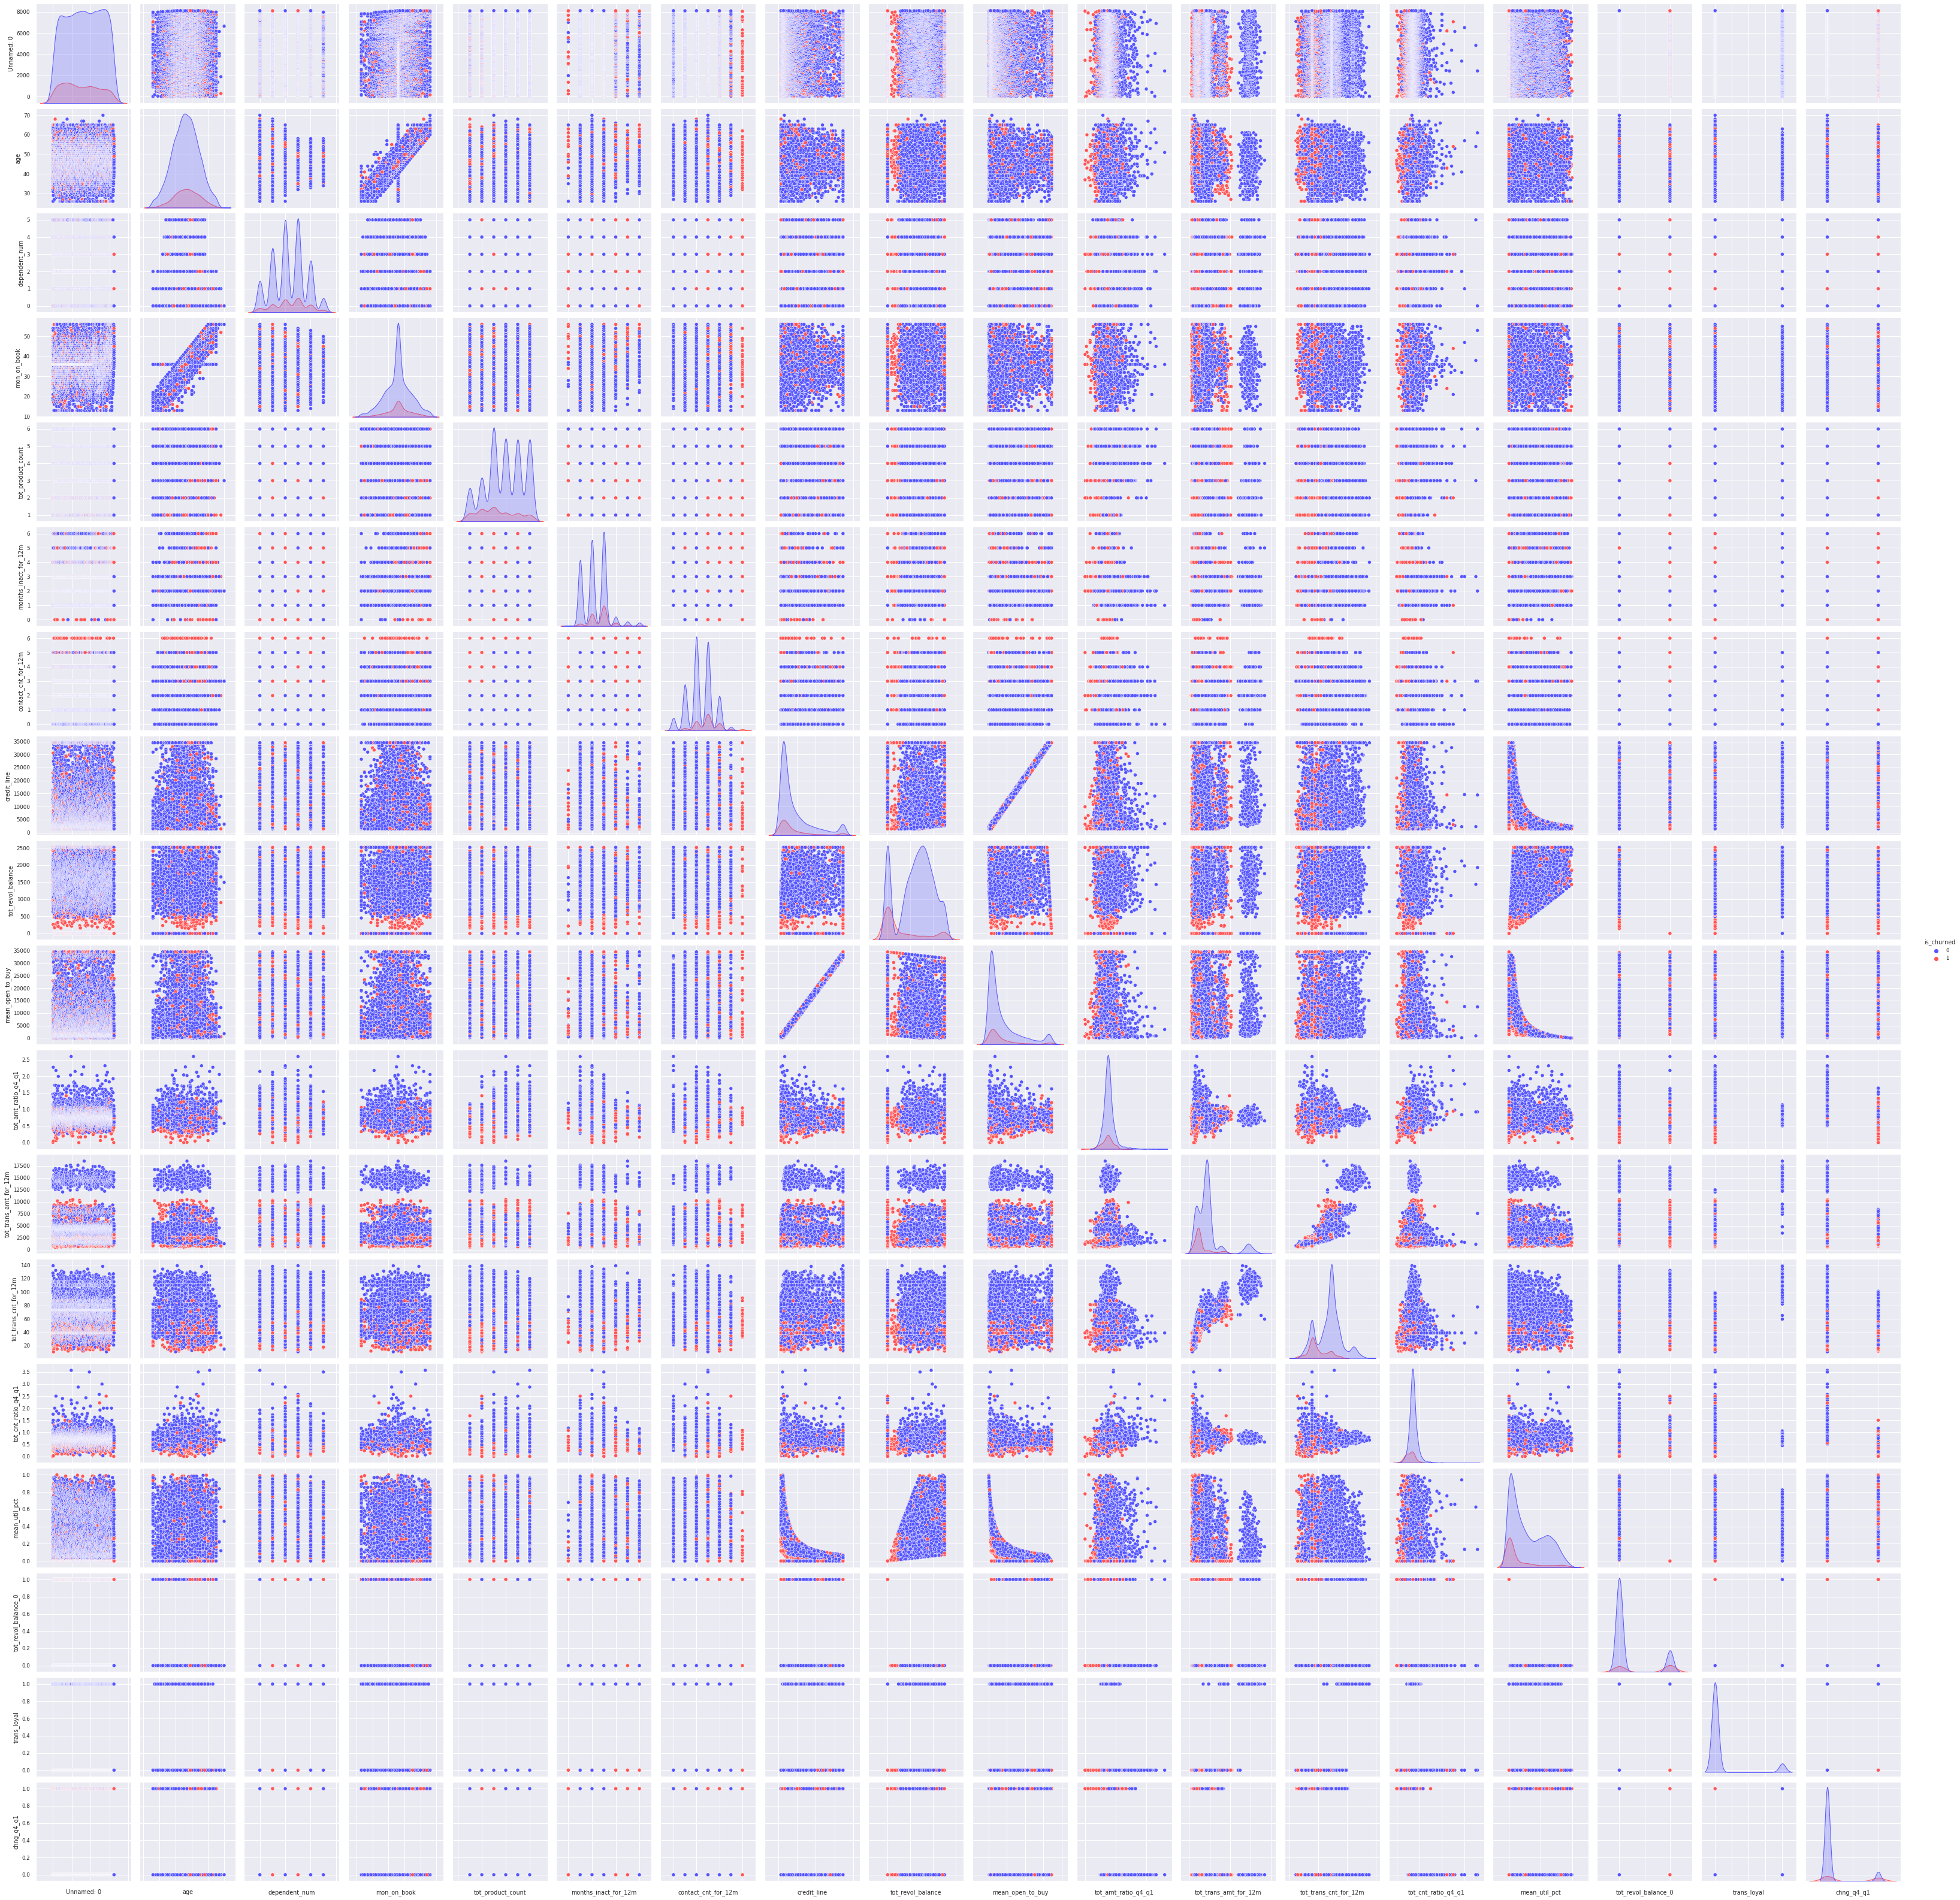

In [83]:
# 파란/빨간색으로 이탈에 영향을 주는 요인 예상
g = sns.pairplot(df[n],hue='is_churned',palette='seismic',diag_kind='kde'
                ,diag_kws=dict(shade=True))
g.set(xticklabels=[])

**<span style= 'background-color:#fff5b1'>마지막 항목 결정</span>**

In [84]:
df_num.columns

Index(['Unnamed: 0', 'age', 'dependent_num', 'mon_on_book',
       'tot_product_count', 'months_inact_for_12m', 'contact_cnt_for_12m',
       'tot_revol_balance', 'mean_open_to_buy', 'tot_amt_ratio_q4_q1',
       'tot_trans_amt_for_12m', 'tot_trans_cnt_for_12m', 'tot_cnt_ratio_q4_q1',
       'mean_util_pct', 'tot_revol_balance_0', 'trans_loyal', 'chng_q4_q1'],
      dtype='object')

In [85]:
df_cat.columns

Index(['sex', 'education', 'marital_stat', 'imcome_cat', 'card_type'], dtype='object')

In [86]:
# For dropping columns
# columns_to_drop = [
#                         "sex"
#                         "imcome_cat",
#                         "marital_stat"
#                    ]

In [87]:
dfh = df[cat].copy()
# dfh.drop(columns_to_drop, axis=1, inplace=True)
dfh[:3]

sex    education marital_stat      imcome_cat card_type
0   F  High School      Married  Less than $40K      Blue
1   M      Unknown       Single     $40K - $60K      Blue
2   M    Doctorate     Divorced    $80K - $120K      Blue

In [88]:
one_hot_cols = dfh.columns.tolist()  
# get_dummies 인코딩을 시켜 줌
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)  
dfh_enc.head()   #인코딩한 것을 확인

sex_F  sex_M  education_College  education_Doctorate  education_Graduate  \
0      1      0                  0                    0                   0   
1      0      1                  0                    0                   0   
2      0      1                  0                    1                   0   
3      1      0                  0                    0                   0   
4      1      0                  0                    0                   0   

   education_High School  education_Post-Graduate  education_Uneducated  \
0                      1                        0                     0   
1                      0                        0                     0   
2                      0                        0                     0   
3                      0                        0                     1   
4                      0                        0                     1   

   education_Unknown  marital_stat_Divorced  marital_stat_Married  \
0                  0                      0                     1   
1                  1                      0                     0   
2                  0                      1                     0   
3                  0                      0                     0   
4                  0                      0                     1   

   marital_stat_Single  marital_stat_Unknown  imcome_cat_$120K +  \
0                    0                     0                   0   
1                    1                     0                   0   
2                    0                     0                   0   
3                    1                     0                   0   
4                    0                     0                   0   

   imcome_cat_$40K - $60K  imcome_cat_$60K - $80K  imcome_cat_$80K - $120K  \
0                       0                       0                        0   
1                       1                       0                        0   
2                       0                       0                        1   
3                       0                       0                        0   
4                       0                       0                        0   

   imcome_cat_Less than $40K  imcome_cat_Unknown  card_type_Blue  \
0                          1                   0               1   
1                          0                   0               1   
2                          0                   0               1   
3                          1                   0               1   
4                          0                   1               1   

   card_type_Gold  card_type_Platinum  card_type_Silver  
0               0                   0                 0  
1               0                   0                 0  
2               0                   0                 0  
3               0                   0                 0  
4               0                   0                 0

In [89]:
df_final = pd.concat([df_num,dfh_enc], axis=1)
df_final.head()

Unnamed: 0  age  dependent_num  mon_on_book  tot_product_count  \
0           0   45              3           36                  4   
1           1   58              0           45                  3   
2           2   46              3           38                  6   
3           3   34              2           24                  6   
4           4   49              2           41                  3   

   months_inact_for_12m  contact_cnt_for_12m  tot_revol_balance  \
0                     3                    3         1661.00000   
1                     1                    3         2517.00000   
2                     3                    3         1771.00000   
3                     2                    2            0.00000   
4                     5                    2          749.00000   

   mean_open_to_buy  tot_amt_ratio_q4_q1  tot_trans_amt_for_12m  \
0        1883.00000              0.83100            14357.00000   
1         904.00000              0.99200              992.00000   
2        6487.00000              0.78590             1447.00000   
3        1438.30000              0.82700             3940.00000   
4        2379.00000              0.59800             3834.10000   

   tot_trans_cnt_for_12m  tot_cnt_ratio_q4_q1  mean_util_pct  \
0              111.00000              0.73400        0.46900   
1               21.00000              0.40000        0.73600   
2               23.00000              0.00000        0.21400   
3               82.00000              0.95200        0.00000   
4               60.90000              0.65770        0.23900   

   tot_revol_balance_0  trans_loyal  chng_q4_q1  sex_F  sex_M  \
0                    0            1           0      1      0   
1                    0            0           1      0      1   
2                    0            0           1      0      1   
3                    1            0           0      1      0   
4                    0            0           0      1      0   

   education_College  education_Doctorate  education_Graduate  \
0                  0                    0                   0   
1                  0                    0                   0   
2                  0                    1                   0   
3                  0                    0                   0   
4                  0                    0                   0   

   education_High School  education_Post-Graduate  education_Uneducated  \
0                      1                        0                     0   
1                      0                        0                     0   
2                      0                        0                     0   
3                      0                        0                     1   
4                      0                        0                     1   

   education_Unknown  marital_stat_Divorced  marital_stat_Married  \
0                  0                      0                     1   
1                  1                      0                     0   
2                  0                      1                     0   
3                  0                      0                     0   
4                  0                      0                     1   

   marital_stat_Single  marital_stat_Unknown  imcome_cat_$120K +  \
0                    0                     0                   0   
1                    1                     0                   0   
2                    0                     0                   0   
3                    1                     0                   0   
4                    0                     0                   0   

   imcome_cat_$40K - $60K  imcome_cat_$60K - $80K  imcome_cat_$80K - $120K  \
0                       0                       0                        0   
1                       1                       0                        0   
2                       0                       0                        1   
3                       0   

<a id="split_scale"></a>
## Split & Scale

**<span style= 'background-color:#fff5b1'>train/test 분할</span>**

In [90]:
target = df['is_churned']

In [91]:
# import the train_test_split method
train, test, target_train, target_val = train_test_split(df_final,
                                                         target,
                                                         train_size=0.80,
                                                         random_state=0);

**<span style= 'background-color:#fff5b1'>데이터 스케일링</span>**

- RobustScaler : 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [92]:
# Scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
                 'dependent_num',
                 'mon_on_book',
                 'tot_product_count',
                 'months_inact_for_12m',
                 'contact_cnt_for_12m',
                 'tot_revol_balance',
                 'mean_open_to_buy',
                 'tot_amt_ratio_q4_q1',
                 'tot_trans_amt_for_12m',
                 'tot_trans_cnt_for_12m',
                 'tot_cnt_ratio_q4_q1',
                 'mean_util_pct'
               ]

In [93]:
train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(train[num_columns]),
    columns=num_columns,
    index=train.index
)
test[num_columns] = pd.DataFrame(
    robust_scaler.transform(test[num_columns]),
    columns=num_columns,
    index=test.index
)

- SMOTE를 이용한 오버샘플링 적용 Taget Feature 불균형 문제 처리 (적은데이터를 샘플을 많이 만들어서..)

In [94]:
oversampler = SMOTE(random_state=42)
smote_train, smote_target = oversampler.fit_resample(train,target_train)

In [95]:
# smote_train, smote_target

---

# 모델링

<a id="building_models"></a>
## Building Models

In [96]:
#알고리즘 사용
ran = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)

# 리스트 준비
models = [ran, xgb, gbc, ext, ada]         
model_names = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Extra Trees', 'AdaBoost'] 
scores = {}

# 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
# fit 메소드는 데이터를 훈련시킴
# 교차 검증은 트레인 세트를 트레인 세트와 검증 세트로 나누고 훈련된 모델이 검증 세트에 대해 작동하는지 확인하는 것
# 따라서 cv = 10 은 10번 교차 검증을 수행함을 의미
for ind, mod in enumerate(models):
    mod.fit(smote_train, smote_target)
    acc = cross_val_score(mod, smote_train, smote_target, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

[16:16:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [97]:
# 결과 테이블
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)  #.reset_index()
result_df.head(11)

0       1       2       3       4       5       6  \
XGBoost           0.85635 0.85359 0.99263 0.98158 0.98435 0.98803 0.98895   
Random Forest     0.82873 0.83886 0.98250 0.97238 0.97606 0.97606 0.97882   
Gradient Boosting 0.79466 0.81584 0.98066 0.97238 0.98250 0.97882 0.97974   
AdaBoost          0.80018 0.80110 0.96317 0.96409 0.95212 0.96041 0.97238   
Extra Trees       0.69982 0.72744 0.98527 0.97514 0.98343 0.98250 0.98158   

                        7       8       9    mean  
XGBoost           0.98987 0.98157 0.98341 0.96003  
Random Forest     0.97698 0.97788 0.97972 0.94880  
Gradient Boosting 0.98066 0.97788 0.97419 0.94373  
AdaBoost          0.95856 0.96129 0.95945 0.92927  
Extra Trees       0.98250 0.97880 0.98525 0.92817

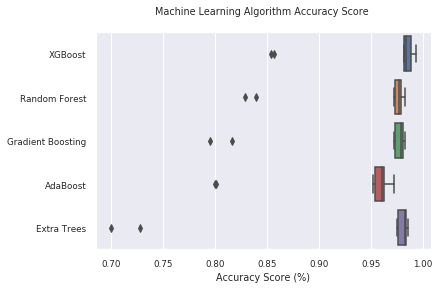

In [98]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

**<span style= 'background-color:#fff5b1'>Feature 중요도 확인</span>**

In [99]:
# 중요도 확인 함수
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

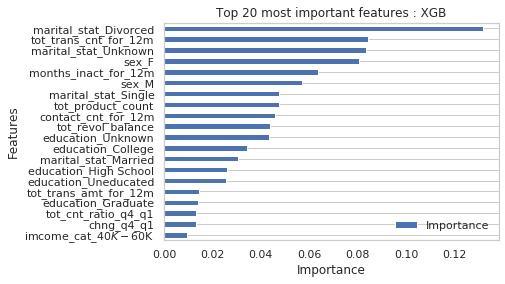

In [100]:
# 데이터 프레임에 항목 중요도 넣기
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
# 그래프 제목
title = 'Top 20 most important features : XGB'
# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [101]:
# 5가지 모델에 대한 항목 중요도 얻기
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 하나의 데이터프레임으로
importances = xgb_imp.merge(ran_imp, on='Feature').merge(gbc_imp, on='Feature')\
                     .merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')
# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)
# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

**<span style= 'background-color:#fff5b1'>Top 20 important features </span>**

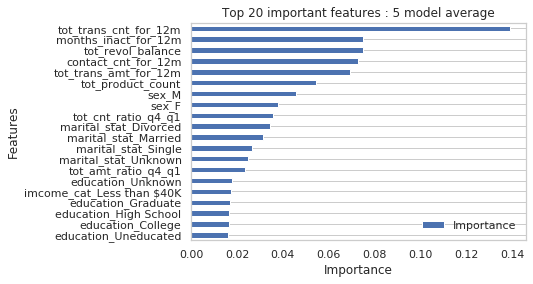

In [102]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)
# 그래프 타이틀
title = 'Top 20 important features : 5 model average'
# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

<a id="hyperparameter_tuning"></a>
## Hyperparameter Tuning

**<span style= 'background-color:#fff5b1'>XGBoost</span>**

- step1

In [103]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]         #먼저 실행 속도를 낮추고 10에서 1000사이의 트리에서 작동하는지 확인

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(smote_train, smote_target)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1)}

- step2

In [ ]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]    
min_child_weight = [1, 2, 3, 4, 5, 6]    

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(smote_train, smote_target)
print(gd.best_score_)
print(gd.best_params_)

- step3

In [ ]:
#위에서 이미 조정한 파라미터를 사용하여 감마 값을 조정할 수 있음
#감마는 다양한 값을 가질 수 있지만 여기서 5개의 값을 확인 -> 보다 정확한 값으로 들어갈 수 있음
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(smote_train, smote_target)
print(gd.best_score_)
print(gd.best_params_)

- step4

In [ ]:
#다른 하위 샘플과 colsample_bytree 값을 시도하는 것
#이를 2단계로 수행하고 둘 다 시작하려면 0.6-1의 값을 사용
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(smote_train, smote_target)
print(gd.best_score_)
print(gd.best_params_)

- step 5

In [ ]:
#정규화를 적용하여 과적합을 줄이는 것
#감마가 복잡성을 제어하는 실질적인 방법을 제공하기 때문에 대부분 이 파라미터를 사용하지 않음
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(smote_train, smote_target)
print(gd.best_score_)
print(gd.best_params_)

**<span style= 'background-color:#fff5b1'>RandomForestClassifier</span>**

In [ ]:
n_estimators = [10, 50, 100, 200]    # 트리 수를 의미
max_depth = [3, None]               # 트리의 최대 깊이
# None은 모든 잎이 순수하거나 모든 잎이 min_samples_split 미만의 샘플을 포함할 때까지 노드가 확장됨을 의미

max_features = [0.1, 0.2, 0.5, 0.8] # 최상의 분할을 찾을 때 고려해야할 기능의 수를 의미
min_samples_split = [2, 6]          # 내부 노드를 분할하는 데 필요한 최소 샘플 수를 나타냄
min_samples_leaf = [2, 6]           # 리프 노드에 있어야하는 최소 샘플 수를 의미함

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(smote_train, smote_target)
print(gd.best_score_)
print(gd.best_params_)

**<span style= 'background-color:#fff5b1'>Gradient Boosting</span>**

In [ ]:
# learning_rate는 각 트리의 기여를 줄이는 역할
# n_estimator는 각 경우의 트리 숫자
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(smote_train, smote_target)
print(gd.best_score_)
print(gd.best_params_)

**<span style= 'background-color:#fff5b1'>ExtraTrees</span>**

In [ ]:
# 엑스트라 트리의 경우, 랜덤 포레스트와 거의 동일하지만 심하게 랜덤으로 하는 것임
n_estimators = [10, 25, 50, 75, 100]  # 포레스트의 트리 수를 나타냄
max_depth = [3, None]                # 트리의 최대 깊이
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(smote_train, smote_target)
print(gd.best_score_)
print(gd.best_params_)

**<span style= 'background-color:#fff5b1'>AdaBoost</span>**

In [ ]:
# adaptive boost
n_estimators = [10, 100, 200, 500]  # 모델 수 의미
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]  # 각 모델에 가중치에 기여하며 기본값은 1임
                                                    #learning_rate을 줄이면 가중치가 약간 증가하거나 감소하여 훈련모델을 느리게 만듬
hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(smote_train, smote_target)
print(gd.best_score_)
print(gd.best_params_)

**<span class="burk"><span class="pirk">모델 재학습</span></span>** 

In [ ]:
# 동일한 알고리즘을 사용하지만 가장 좋은 하이퍼 매개 변수를 사용함

xgb = XGBClassifier(learning_rate=0.01, n_estimators=500, max_depth=10, min_child_weight=1,
                    gamma=0.4, subsample=0.9, colsample_bytree=0.8, reg_alpha=1e-05)

ran = RandomForestClassifier(max_depth=None, max_features=0.2, min_samples_leaf=2, 
                             min_samples_split=2, n_estimators=200, random_state=1)

gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)

ext = ExtraTreesClassifier(max_depth=None, max_features=0.8, min_samples_leaf=2, 
                           min_samples_split=2, n_estimators=100, random_state=1)

ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=1)

# 리스트 준비
models = [xgb, ran, gbc, ext, ada]         
model_names = ['XGBoost', 'Random Forest', 'Gradient Boosting', 'Extra Trees', 'AdaBoost']
scores2 = {}

# Sequentially fit and cross validate all models (모든 모델을 순차적으로 fit하고 교차 검증함)
for ind, mod in enumerate(models):
    mod.fit(smote_train, smote_target)
    acc = cross_val_score(mod, smote_train, smote_target, scoring = "accuracy", cv = 10)
    scores2[model_names[ind]] = acc

In [ ]:
# accuracy
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

**<span style= 'background-color:#fff5b1'>Voting</span>**

- Hard Voting : 작은 subset에서 만든 것에 똑같은 비율 (1이냐 0이냐 투표)
- Soft Voting : 각 서브셋에서 만든 확률의 %로 계산

In [ ]:
# 하드보팅을 한 다음 소프트보팅을 함
# 튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, smote_train, smote_target, cv=10)
grid_hard.fit(smote_train, smote_target)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

In [ ]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, smote_train, smote_target, cv=10)
grid_soft.fit(smote_train, smote_target)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

<a id="model_evaluation"></a>
## Model Evaluation

- ROC Curve(Receiver-Operating Characteristic curve)는 민감도와 특이도가 서로 어떤 관계를 가지며 변하는지를 2차원 평면상에 표현한 커브
- AUC(Area Under Curve)는 ROC Curve의 면적을 뜻하고, 1에 가까울수록 좋은 모델을 의미

In [ ]:
# XGBClassifier
xgb.predicts = xgb.predict(test)
# F_positive_rate, T_positive_rate 구하기
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(target_val, xgb.predicts)
xgb_roc_auc = roc_auc_score(target_val, xgb.predicts)

print("ROC AUC Score: {}".format(xgb_roc_auc))
print("Accuracy score : {}".format(accuracy_score(target_val, xgb.predicts)))
print("="*60)
print(classification_report(target_val, xgb.predicts))

In [ ]:
# RandomForestClassifier
ran.predicts = ran.predict(test)
# F_positive_rate, T_positive_rate 구하기
ran_fpr, ran_tpr, ran_thresholds = roc_curve(target_val, ran.predicts)
ran_roc_auc = roc_auc_score(target_val, ran.predicts)

print("ROC AUC Score: {}".format(ran_roc_auc))
print("Accuracy score : {}".format(accuracy_score(target_val, ran.predicts)))
print("="*60)
print(classification_report(target_val, ran.predicts))

In [ ]:
# GradientBoostingClassifier
gbc.predicts = gbc.predict(test)
# F_positive_rate, T_positive_rate 구하기
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(target_val, gbc.predicts)
gbc_roc_auc = roc_auc_score(target_val, gbc.predicts)

print("ROC AUC Score: {}".format(gbc_roc_auc))
print("Accuracy score : {}".format(accuracy_score(target_val, gbc.predicts)))
print("="*60)
print(classification_report(target_val, gbc.predicts))

In [ ]:
# ExtraTreesClassifier
ext.predicts = ext.predict(test)
# F_positive_rate, T_positive_rate 구하기
ext_fpr, ext_tpr, ext_thresholds = roc_curve(target_val, ext.predicts)
ext_roc_auc = roc_auc_score(target_val, ext.predicts)

print("ROC AUC Score: {}".format(ext_roc_auc))
print("Accuracy score : {}".format(accuracy_score(target_val, ext.predicts)))
print("="*60)
print(classification_report(target_val, ext.predicts))

In [ ]:
# AdaBoostClassifier
ada.predicts = ada.predict(test)
# F_positive_rate, T_positive_rate 구하기
ada_fpr, ada_tpr, ada_thresholds = roc_curve(target_val, ada.predicts)
ada_roc_auc = roc_auc_score(target_val, ada.predicts)

print("ROC AUC Score: {}".format(ada_roc_auc))
print("Accuracy score : {}".format(accuracy_score(target_val, ada.predicts)))
print("="*60)
print(classification_report(target_val, ada.predicts))

In [ ]:
# Hard Voting
grid_hard.predicts = grid_hard.predict(test)
# F_positive_rate, T_positive_rate 구하기
grid_hard_fpr, grid_hard_tpr, grid_hard_thresholds = roc_curve(target_val, grid_hard.predicts)
grid_hard_roc_auc = roc_auc_score(target_val, grid_hard.predicts)

print("ROC AUC Score: {}".format(grid_hard_roc_auc))
print("Accuracy score : {}".format(accuracy_score(target_val, grid_hard.predicts)))
print("="*60)
print(classification_report(target_val, grid_hard.predicts))

In [ ]:
# Soft Voting 
grid_soft.predicts = grid_soft.predict(test)
# F_positive_rate, T_positive_rate 구하기
grid_soft_fpr, grid_soft_tpr, grid_soft_thresholds = roc_curve(target_val, grid_soft.predicts)
grid_soft_roc_auc = roc_auc_score(target_val, grid_soft.predicts)

print("ROC AUC Score: {}".format(grid_soft_roc_auc))
print("Accuracy score : {}".format(accuracy_score(target_val, grid_soft.predicts)))
print("="*60)
print(classification_report(target_val, grid_soft.predicts))

In [ ]:
# Roc 곡선
plt.plot([0, 1], [0, 1],"k--", "r+",lw=1) # y = x 직선 표시
plt.step(grid_soft_fpr, grid_soft_tpr, color='blue', label='grid_soft',lw=1,alpha = 0.3 )
plt.step(grid_hard_fpr, grid_hard_tpr, color='green', label='grid_hard',lw=1,alpha = 0.4 )
plt.step(gbc_fpr, gbc_tpr, color='red',label='gbc',lw=1,alpha = 0.3)
plt.step(xgb_fpr, xgb_tpr, color='orange', label='gbc',lw=1,alpha = 0.3)

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.legend()
plt.grid(False) # 격자제거
plt.show()

---

# 결론

- Feature 중요도는 거래 금액과 횟수, 리볼빙잔액 순으로 중요도가 큼
- 카드사용 촉진화 전략 : 특정 거래 금액 범위에 속하는 고객에게 인센티브를 제공하거나 카드를 더 자주 사용하게 장려할 수 있는 캐시백 및 혜택 제공
- 이탈예상 고객 타겟 마케팅 : 이탈 가능성이 높은 고객(리볼빙 잔액이 없거나 최근 12개월간 2~3개월 이상 카드를 사용하지 않은 고객 등)은 타겟 마케팅을 통해 집중적 고객 관리가 필요
- 다양한 상품 및 서비스 제공 : 기혼자&부양가족이 있는 고객을 위한 가족상품 등과 같이 고객의 보유 상품개수를 늘리기 위해 다양한 상품 및 서비스를 제공
- 고객 서비스 만족도 개선 : 최근 12개월 동안 연락 횟수가 증가할수록 이탈률이 증가함. 이는 서비스 품질 개선 및 고객 문제 해결에 집중하는 것이 고객 만족과 충성도를 높일 수 있음

---

# 평가함수 정의

- 평가를 위한 전처리 모음 함수 정의

In [ ]:
def test_transform_function(x_test):
    """앞 단계에서 모델 학습을 위한 데이터 세트에 적용한 전처리 내용을 평가 세트에 적용하기 위한 함수"""
    
    # 1. add new feature
    # tot_revol_balance_0
    x_test["tot_revol_balance_0"]= [1 if i == 0 else 0 for i in x_test['tot_revol_balance']] 
    # trans_loyal
    x_test['trans_loyal'] = 0
    x_test.loc[(x_test['tot_trans_amt_for_12m'] >= 12500) | (x_test['tot_trans_cnt_for_12m'] >= 100), 'trans_loyal'] = 1
    # chng_q4_q1
    x_test['chng_q4_q1'] = 0
    x_test.loc[(df['tot_amt_ratio_q4_q1'] < 0.5) | (x_test['tot_cnt_ratio_q4_q1'] < 0.5), 'chng_q4_q1'] = 1
    
    
    # 2. drop a column
    columns_to_drop = [
                        "cstno",
                        "is_churned",
                        "credit_line"
#                        , "sex"
                       ]
    x_test.drop(columns_to_drop, axis=1, inplace=True)
    
    
    # 3. Feature 인코딩
    dfn = x_test.select_dtypes('number').copy()
    dfh = x_test.select_dtypes(include=['object']).copy()
    one_hot_cols = dfh.columns.to_list()
    dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)
    x_test = pd.concat([dfn,dfh_enc], axis=1)
    
    
    # 4. Scale the numerical columns 
    # from sklearn.preprocessing import RobustScaler
    robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
    num = [
             'dependent_num',
             'mon_on_book',
             'tot_product_count',
             'months_inact_for_12m',
             'contact_cnt_for_12m',
             'tot_revol_balance',
             'mean_open_to_buy',
             'tot_amt_ratio_q4_q1',
             'tot_trans_amt_for_12m',
             'tot_trans_cnt_for_12m',
             'tot_cnt_ratio_q4_q1',
             'mean_util_pct'
         ]
    x_test[num] = pd.DataFrame(
                                   robust_scaler.transform(x_test[num]),
                                   columns=num,
                                   index=x_test.index
                               )  
    
    return x_test

In [ ]:
X_test = test_transform_function(df_hidden)

In [ ]:
hiddenset = pd.read_csv('../JB_contest_2023/hiddentest.csv')
df_hidden = hiddenset.copy()